# DSC 478 Final Project
Group: Flying Squirrels \
Students: Nikki Frank, Alexandria Morales-Garcia, John Komarnicki, Rudhvish Brijeshbhai Patel  \
Date: 3/15/25

In [2]:
# Loading in packages kmeans and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler #
from sklearn.cluster import KMeans # 

#agglomerative
from scipy.cluster.hierarchy import dendrogram, linkage as sch_linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.manifold import TSNE

#dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#classification
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

# Exploring the data and preprocessing

In [4]:
#find current working directory
%pwd

'/Users/nicole.r.frank/Documents/Top_Drawer/MS_Artificial_Intelligence_DePaul_University/Classes/DSC_478_Programming_Machine_Learning_Applications/DSC_478_Final_Project/Final_Code'

In [5]:
# Loading in the data - 
food_df = pd.read_csv("newfood.csv")

In [6]:
# Dropping rows we did not want - 
food_modified_df= food_df.drop(['id','title', 'ingredients', 'Alcohol/g', 'Caffeine/g', 'image', 
        'spoonacularSourceUrl', 'dishTypes', 'cuisines', 'gaps', 'veryHealthy', 'veryPopular', 'spoonacularScore'], axis=1)

In [11]:
# Exploring the data stats - 
food_modified_df.describe()

,pricePerServing,weightPerServing,readyInMinutes,aggregateLikes,healthScore,percentProtein,percentFat,percentCarbs,calories,Fat/g,...,Magnesium/mg,Vitamin B12/µg,Vitamin B5/mg,Vitamin B6/mg,Vitamin E/mg,Fiber/g,Vitamin A/IU,Vitamin D/µg,Vitamin K/µg,Vitamin C/mg
count,1722.000000,1.722000e+03,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1.722000e+03,1.722000e+03,...,1.722000e+03,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000
mean,21.818692,4.558444e+03,58.141696,15.098142,35.912892,27.412561,49.961005,22.626434,1.011644e+04,6.887053e+02,...,8.894651e+02,32.022584,21.266521,16.018072,16.925430,10.343868,2611.090889,28.920987,114.089001,171.592706
std,703.074949,1.724935e+05,193.216337,67.949782,28.447480,17.292022,19.602315,18.049344,3.978688e+05,2.739705e+04,...,3.315412e+04,1151.069761,807.117860,629.492233,569.615421,249.997180,5599.724187,1088.241944,1248.296209,5357.484198
min,0.066500,4.000000e+00,2.000000,0.000000,0.000000,0.480000,1.930000,0.000000,6.810000e+00,1.300000e-01,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.749975,1.832500e+02,30.000000,0.000000,13.000000,12.805000,34.947500,7.915000,2.535975e+02,1.204500e+01,...,3.538750e+01,0.190000,0.500000,0.240000,1.190000,1.020000,425.302500,0.000000,9.600000,5.620000
50%,3.543150,2.975000e+02,45.000000,0.000000,29.000000,24.880000,49.485000,17.535000,4.215300e+02,2.108500e+01,...,6.778000e+01,1.640000,1.160000,0.540000,2.445000,2.700000,997.195000,0.230000,27.520000,17.435000
75%,5.841475,4.860000e+02,45.000000,4.000000,53.000000,38.857500,63.510000,33.650000,6.298450e+02,3.503000e+01,...,1.068925e+02,5.437500,2.187500,1.050000,4.137500,5.315000,2814.150000,1.460000,78.597500,53.250000
max,29179.204900,7.158342e+06,4500.000000,1176.000000,100.000000,82.390000,98.340000,89.640000,1.651086e+07,1.136922e+06,...,1.375879e+06,47768.410000,33494.500000,26122.780000,23640.130000,10375.010000,109704.400000,45160.470000,51265.460000,222345.770000


In [13]:
# Seeing what is correlated with healthscore - 
food_modified_df.corr()['healthScore'].abs().sort_values(ascending=False)

healthScore         1.000000
percentFat          0.338246
Vitamin A/IU        0.317094
percentProtein      0.257626
dairyFree           0.208614
whole30             0.131077
percentCarbs        0.120533
vegetarian          0.120360
Vitamin K/µg        0.103235
Carbohydrates/g     0.081697
Sugar/g             0.073609
Manganese/mg        0.067127
Fiber/g             0.065645
Folate/µg           0.061339
Vitamin C/mg        0.059487
Calcium/mg          0.059108
pricePerServing     0.058329
Vitamin B12/µg      0.057351
Vitamin E/mg        0.056687
Magnesium/mg        0.056232
Copper/mg           0.056227
Vitamin B5/mg       0.055989
Iron/mg             0.055877
Potassium/mg        0.055706
Vitamin D/µg        0.055703
weightPerServing    0.055635
Selenium/µg         0.055456
Vitamin B6/mg       0.055315
Phosphorus/mg       0.055169
Vitamin B3/mg       0.055154
Vitamin B2/mg       0.055048
Protein/g           0.055029
Cholesterol/mg      0.054976
calories            0.054933
Zinc/mg       

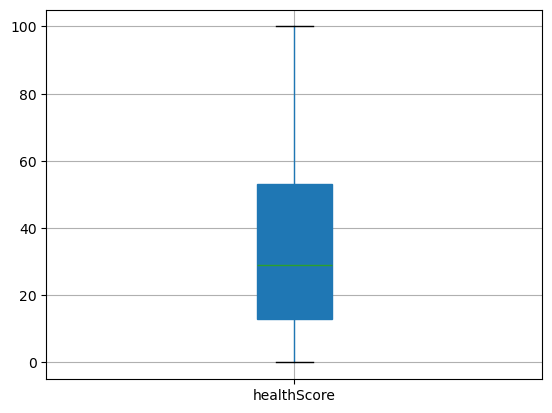

In [15]:
# Seeing the distrubution of healthscore- 
food_modified_df.boxplot(column=['healthScore'], patch_artist=True)
plt.show()

# DBSCAN

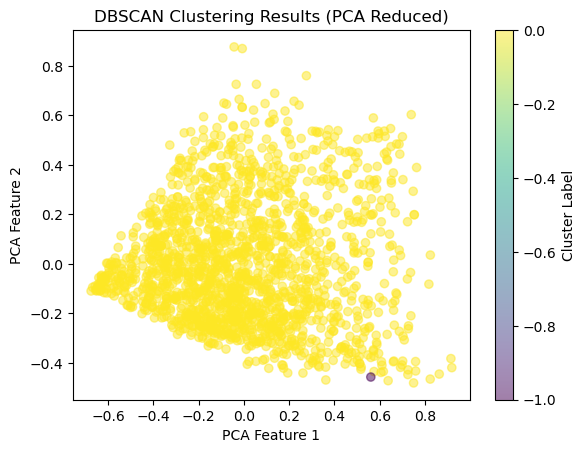

Cluster
 0    1721
-1       1
Name: count, dtype: int64


In [18]:
# Load the dataset
file_path = "newfood.csv"  # Ensure the dataset is in the correct location
food_df = pd.read_csv(file_path)

# Dropping non-numerical and irrelevant columns
columns_to_drop = ['id','title', 'ingredients', 'Alcohol/g', 'Caffeine/g', 'image', 
        'spoonacularSourceUrl', 'dishTypes', 'cuisines', 'gaps', 'veryHealthy', 'veryPopular', 'spoonacularScore']
food_modified_df = food_df.drop(columns=columns_to_drop, errors='ignore')

# Selecting only numerical features for clustering
X = food_modified_df.select_dtypes(include=[np.number])

# Normalizing the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce dimensions to 2 for better visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Applying DBSCAN with adjusted parameters
eps_value = 1.0  # Decreased epsilon value for finer clustering
min_samples_value = 10  # Increased min_samples to reduce noise

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(X_scaled)

# Adding cluster labels to the dataframe
food_modified_df['Cluster'] = clusters

# Visualizing the clusters using PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("DBSCAN Clustering Results (PCA Reduced)")
plt.colorbar(label="Cluster Label")
plt.show()

# Checking cluster distribution
print(food_modified_df['Cluster'].value_counts())

Almost All Points Are in One Cluster (Cluster 0):

1720 points are in Cluster 0, meaning the clustering is too broad.
Only 1 points are outliers (-1).


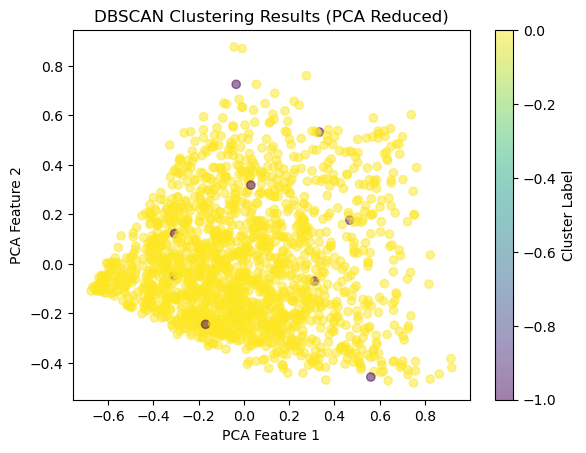

Cluster
 0    1713
-1       9
Name: count, dtype: int64


In [20]:
# Load the dataset
file_path = "newfood.csv"  # Ensure the dataset is in the correct location
food_df = pd.read_csv(file_path)

# Dropping non-numerical and irrelevant columns
columns_to_drop = ['id','title', 'ingredients', 'Alcohol/g', 'Caffeine/g', 'image', 
        'spoonacularSourceUrl', 'dishTypes', 'cuisines', 'gaps', 'veryHealthy', 'veryPopular', 'spoonacularScore']
food_modified_df = food_df.drop(columns=columns_to_drop, errors='ignore')

# Selecting only numerical features for clustering
X = food_modified_df.select_dtypes(include=[np.number])

# Normalizing the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce dimensions to 2 for better visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Further tuning DBSCAN parameters
eps_value = 0.5  # Decreased epsilon value to form more distinct clusters
min_samples_value = 15  # Increased min_samples to reduce noise further

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(X_scaled)

# Adding cluster labels to the dataframe
food_modified_df['Cluster'] = clusters

# Visualizing the clusters using PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("DBSCAN Clustering Results (PCA Reduced)")
plt.colorbar(label="Cluster Label")
plt.show()

# Checking cluster distribution
print(food_modified_df['Cluster'].value_counts())

More distinct noise points (-1): Now, 19 points are identified as noise, which is better than before.
Still a dominant single cluster (Cluster 0): 1713 points in one cluster, meaning DBSCAN still isn't forming multiple meaningful clusters.

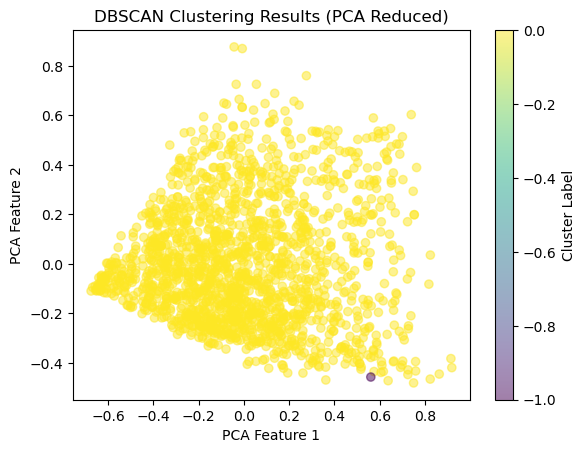

Cluster
 0    1721
-1       1
Name: count, dtype: int64


In [23]:
# Load the dataset
file_path = "newfood.csv"  # Ensure the dataset is in the correct location
food_df = pd.read_csv(file_path)

# Dropping non-numerical and irrelevant columns
columns_to_drop = ['id','title', 'ingredients', 'Alcohol/g', 'Caffeine/g', 'image', 
        'spoonacularSourceUrl', 'dishTypes', 'cuisines', 'gaps', 'veryHealthy', 'veryPopular', 'spoonacularScore']
food_modified_df = food_df.drop(columns=columns_to_drop, errors='ignore')

# Selecting only numerical features for clustering
X = food_modified_df.select_dtypes(include=[np.number])

# Normalizing the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce dimensions to 2 for better visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Further tuning DBSCAN parameters
eps_value = 3.0  # Decreased epsilon value to form more distinct clusters
min_samples_value = 20  # Increased min_samples to reduce noise further

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(X_scaled)

# Adding cluster labels to the dataframe
food_modified_df['Cluster'] = clusters

# Visualizing the clusters using PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("DBSCAN Clustering Results (PCA Reduced)")
plt.colorbar(label="Cluster Label")
plt.show()

# Checking cluster distribution
print(food_modified_df['Cluster'].value_counts())

Almost everything is in one cluster (Cluster 0):

1721 points in Cluster 0, meaning DBSCAN is grouping nearly all points together.
Only 1 noise point (-1), which means the algorithm sees almost no outliers.
Increasing eps to 3.0 made DBSCAN too permissive:

A larger eps means DBSCAN considers more points as part of the same cluster.
This setting eliminated most outliers but at the cost of forming meaningful clusters.


## DBSCAN Might Not Be the Best Fit:

DBSCAN works well when clusters have variable densities, but the data used might be too evenly spread after scaling. If the data is globally structured rather than locally dense, K-Means or Hierarchical Clustering might work better.

# kMeans Clustering Analysis Experiments 
#### Evaluating K values(potential # of classes (kValues)), # of features, and normalization methods
#### Evaluation Methods: Silhouette Scores and Elbow Method (SSE vs. K-values)


In [29]:
#kMeans Data Preparation - 
#drop bad features (boolean values) (treating healthScore as target, so dropping it out)
food_drop1_df= food_df.drop(['id','title', 'ingredients', 'Alcohol/g', 'Caffeine/g', 'image', 
        'spoonacularSourceUrl', 'dishTypes', 'cuisines', 'gaps', 'spoonacularScore','healthScore'], axis=1)

#convert true false columns into numeric values 1s and 0s - 
boolean_cols = ['whole30', 'ketogenic', 'lowFodmap', 'veryPopular', 'veryHealthy',
             'sustainable', 'dairyFree', 'glutenFree', 'vegan', 'vegetarian']
food_drop1_df[boolean_cols] = food_drop1_df[boolean_cols].astype(int)
food_numeric_drop1_df = food_drop1_df

#normalize the entire data frame with a min max scaler so that we don't lose the categorical values (T/F remain 1 and 0) - 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
food_norm_df = scaler.fit_transform(food_numeric_drop1_df)

#print shape of food_norm_df - 
print("food_norm_df shape:", food_norm_df.shape)


food_norm_df shape: (1722, 47)


In [31]:
#convert data back to pandas data frame - 
food_norm_df = pd.DataFrame(food_norm_df, columns=food_numeric_drop1_df.columns)
food_norm_df

,pricePerServing,weightPerServing,vegetarian,vegan,glutenFree,dairyFree,sustainable,veryHealthy,veryPopular,lowFodmap,...,Magnesium/mg,Vitamin B12/µg,Vitamin B5/mg,Vitamin B6/mg,Vitamin E/mg,Fiber/g,Vitamin A/IU,Vitamin D/µg,Vitamin K/µg,Vitamin C/mg
0,0.000190,0.000031,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000053,0.000022,0.000041,0.000010,0.000046,0.000112,0.001411,0.000006,0.000000,0.000000
1,0.000026,0.000004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000009,0.000003,0.000006,0.000002,0.000012,0.000037,0.000000,0.000000,0.000140,0.000000
2,0.000148,0.000050,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.000089,0.000000,0.000023,0.000010,0.000720,0.000963,0.196641,0.000000,0.002034,0.000147
3,0.000276,0.000099,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.000136,0.000076,0.000156,0.000105,0.000221,0.000202,0.001646,0.000138,0.000312,0.000017
4,0.000006,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000010,0.000000,0.000007,0.000001,0.000008,0.000120,0.001169,0.000000,0.000043,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,0.000151,0.000029,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000045,0.000114,0.000089,0.000058,0.000088,0.000198,0.027609,0.000010,0.000187,0.000006
1718,0.000003,0.000004,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000004,0.000000,0.000000,0.000001,0.000000,0.000032,0.000513,0.000000,0.000044,0.000016
1719,0.000094,0.000046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000047,0.000073,0.000036,0.000025,0.000078,0.000341,0.010574,0.000261,0.000169,0.000079
1720,0.000234,0.000066,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000129,0.000151,0.000142,0.000089,0.000071,0.000694,0.101601,0.000000,0.000860,0.000154


In [33]:
#perform first clustering run - 
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1, random_state=33) # initialization

kmeans.fit(food_norm_df)

clusters = kmeans.predict(food_norm_df)


Initialization complete
Iteration 0, inertia 1146.274153499658.
Iteration 1, inertia 829.5748514271052.
Iteration 2, inertia 815.0947127915641.
Iteration 3, inertia 814.7419125706031.
Converged at iteration 3: strict convergence.


In [35]:
#see cluster labels -
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,1
1,1
2,4
3,1
4,2
...,...
1717,0
1718,0
1719,2
1720,0


In [37]:
#display centroids - 
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=food_norm_df.columns)
centroids

,pricePerServing,weightPerServing,vegetarian,vegan,glutenFree,dairyFree,sustainable,veryHealthy,veryPopular,lowFodmap,...,Magnesium/mg,Vitamin B12/µg,Vitamin B5/mg,Vitamin B6/mg,Vitamin E/mg,Fiber/g,Vitamin A/IU,Vitamin D/µg,Vitamin K/µg,Vitamin C/mg
0,0.00,0.00,0.04,0.00,1.00,-0.00,0.00,0.17,0.00,0.13,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
1,0.00,0.00,0.03,0.02,0.59,1.00,0.00,0.18,0.01,0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
2,0.00,0.00,0.03,0.00,-0.00,0.00,0.00,-0.00,0.01,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
3,0.00,0.00,0.04,0.03,1.00,1.00,0.00,0.37,0.01,0.19,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
4,0.01,0.01,0.00,-0.00,-0.00,0.48,0.00,1.00,0.01,-0.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.06,0.01,0.01,0.01


In [39]:
#define the cluster_sizes function - 
#function from class notes
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(food_norm_df[clusters == c])
    return size


In [41]:
#get cluster sizes - 
#function from class notes
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  575
Size of Cluster 1 =  353
Size of Cluster 2 =  344
Size of Cluster 3 =  300
Size of Cluster 4 =  150


Above, we wanted to see the size of the clusters in order to verify that the alogirthm is working and to get a sense of how the data is being seperated.

In [44]:
#measure cohesion and seperation with the silhouette scores range -1 to 1, high val means object is well matched to it's own \
#cluster and well seperated from others -
from sklearn import metrics
silhouettes = metrics.silhouette_samples(food_norm_df, clusters)
print(silhouettes[:20])


[0.16666076 0.16152292 0.35152333 0.11247399 0.66285713 0.06706071
 0.13262447 0.38613094 0.25572711 0.3144054  0.10884477 0.41781488
 0.5550198  0.30721998 0.10490845 0.56027563 0.33646764 0.12336482
 0.15788567 0.39994979]


In [46]:
#compute the silhouette mean - 
print(silhouettes.mean())

0.37175798301608043


The silhouette score above shows that we are clustering, but not strongly.

Below I will start playing around with values of k. 

In [50]:
#experiment with different K values
k_values = list(range(2, 60)) 
mean_silhouette_scores = []
sse_vals = [] 

for k in k_values:
    #perform kMeans clustering
    kmeans = KMeans(n_clusters=k, max_iter=500, verbose=0, random_state=33)
    clusters = kmeans.fit_predict(food_norm_df)
    sse_vals.append(kmeans.inertia_)

    #compute silhouette score
    silhouette_avg = metrics.silhouette_score(food_norm_df, clusters)
    mean_silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")
    print(f"SSE for k={k}: {kmeans.inertia_:.3f}")
    


Silhouette Score for k=2: 0.300
SSE for k=2: 1394.974
Silhouette Score for k=3: 0.336
SSE for k=3: 1071.929
Silhouette Score for k=4: 0.360
SSE for k=4: 905.047
Silhouette Score for k=5: 0.372
SSE for k=5: 814.742
Silhouette Score for k=6: 0.392
SSE for k=6: 744.346
Silhouette Score for k=7: 0.425
SSE for k=7: 643.891
Silhouette Score for k=8: 0.462
SSE for k=8: 556.209
Silhouette Score for k=9: 0.485
SSE for k=9: 497.614
Silhouette Score for k=10: 0.509
SSE for k=10: 455.861
Silhouette Score for k=11: 0.519
SSE for k=11: 424.744
Silhouette Score for k=12: 0.506
SSE for k=12: 410.981
Silhouette Score for k=13: 0.528
SSE for k=13: 372.879
Silhouette Score for k=14: 0.537
SSE for k=14: 353.834
Silhouette Score for k=15: 0.475
SSE for k=15: 337.168
Silhouette Score for k=16: 0.485
SSE for k=16: 318.981
Silhouette Score for k=17: 0.476
SSE for k=17: 313.825
Silhouette Score for k=18: 0.479
SSE for k=18: 283.430
Silhouette Score for k=19: 0.476
SSE for k=19: 275.118
Silhouette Score for k=2

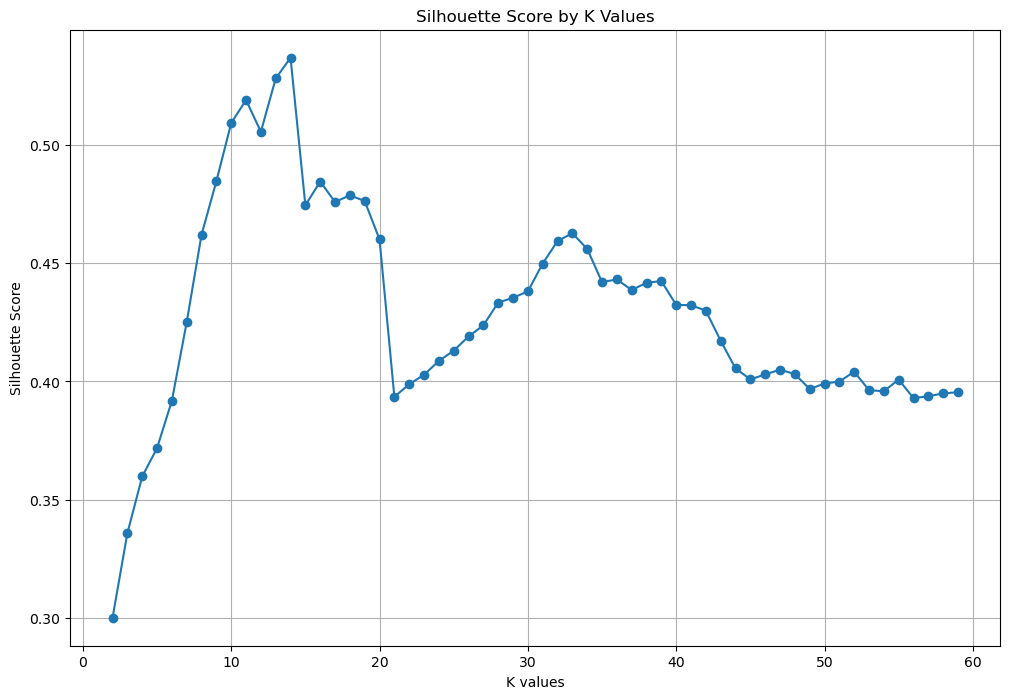

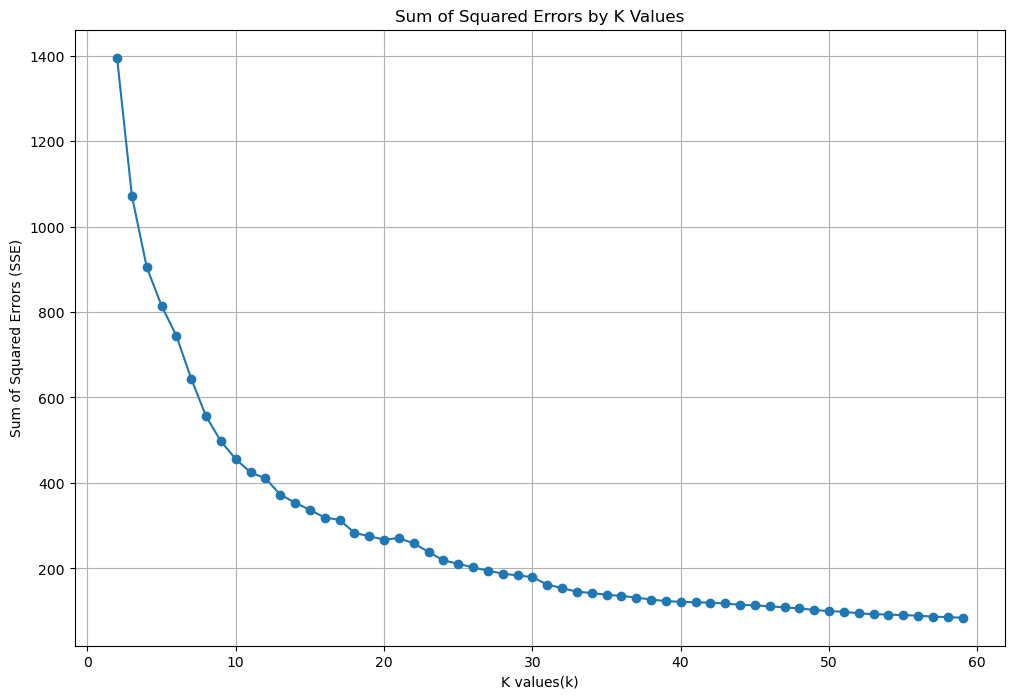

In [51]:
# Plot silhouette scores
plt.figure(figsize=(12, 8))
plt.plot(k_values, mean_silhouette_scores, marker ='o')
plt.xlabel("K values")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score by K Values")
plt.grid(True)
plt.show()

#plot the SSEs against K to evalueate elbow method
plt.figure(figsize=(12, 8))
plt.plot(k_values, sse_vals, marker='o')
plt.xlabel("K values(k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Sum of Squared Errors by K Values")
plt.grid(True)
plt.show()

In [52]:
#examine the sizes of these clusters when k = 11
kmeans = KMeans(n_clusters=11, max_iter=500, verbose=0, random_state=33)
clusters = kmeans.fit_predict(food_norm_df)
#get cluster sizes -
#function from class notes
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  415
Size of Cluster 1 =  131
Size of Cluster 2 =  344
Size of Cluster 3 =  38
Size of Cluster 4 =  145
Size of Cluster 5 =  111
Size of Cluster 6 =  78
Size of Cluster 7 =  72
Size of Cluster 8 =  85
Size of Cluster 9 =  152
Size of Cluster 10 =  151


We did not see a clear elbow in the elbow chart, however we did see some difference in sihloutte score. Currently, it looks like k around 10 might be the best, though the distribution of cluster size is a little uneven. Still, that provides us with a lower silhouette score than we would like. This might imply that we might too many features in the data set. Additionally, for categorization's sake it would be nice to have a lower K value.

Next we will try running the same clustering experiment after dropping the categorical features from the data set. We will also reduce the number of ks we test making it easier to see a K value target

In [54]:
#kMeans Data Preparation - 

#drop bad features and categorical ones, including healthscore.
food_drop2_df= food_df.drop(['id','title', 'ingredients', 'Alcohol/g', 'Caffeine/g', 'image', 
        'spoonacularSourceUrl', 'dishTypes', 'cuisines', 'gaps', 'spoonacularScore','healthScore','whole30', 'ketogenic', 'lowFodmap', 'veryPopular', 'veryHealthy',
             'sustainable', 'dairyFree', 'glutenFree', 'vegan', 'vegetarian'], axis=1)

food_numeric_drop2_df = food_drop2_df

#normalize the entire data frame Standard scaler. some of the values like the ones in magnesium are so small they go to 0 too quickly. - 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
food_norm2_df = scaler.fit_transform(food_numeric_drop2_df)


#print shape of food_norm_df - 
print("food_norm2_df shape:", food_norm2_df.shape)


food_norm2_df shape: (1722, 37)


In [55]:
#convert data back to pandas data frame and verify that categorical values are still 1 and 0 after scaling. - 
food_norm2_df = pd.DataFrame(food_norm2_df, columns=food_numeric_drop2_df.columns)
food_norm2_df

,pricePerServing,weightPerServing,readyInMinutes,aggregateLikes,percentProtein,percentFat,percentCarbs,calories,Fat/g,Saturated Fat/g,...,Magnesium/mg,Vitamin B12/µg,Vitamin B5/mg,Vitamin B6/mg,Vitamin E/mg,Fiber/g,Vitamin A/IU,Vitamin D/µg,Vitamin K/µg,Vitamin C/mg
0,-0.02,-0.03,-0.07,-0.18,0.71,-1.25,0.68,-0.02,-0.02,-0.02,...,-0.02,-0.03,-0.02,-0.03,-0.03,-0.04,-0.44,-0.03,-0.09,-0.03
1,-0.03,-0.03,-0.22,-0.22,0.53,-0.69,0.24,-0.03,-0.03,-0.02,...,-0.03,-0.03,-0.03,-0.03,-0.03,-0.04,-0.47,-0.03,-0.09,-0.03
2,-0.02,-0.02,-0.07,-0.22,-1.20,0.86,0.21,-0.02,-0.02,-0.02,...,-0.02,-0.03,-0.03,-0.03,0.00,-0.00,3.39,-0.03,-0.01,-0.03
3,-0.02,-0.02,-0.07,-0.06,0.14,0.74,-0.94,-0.02,-0.02,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.03,-0.43,-0.02,-0.08,-0.03
4,-0.03,-0.03,-0.29,-0.22,-0.95,-0.51,1.46,-0.03,-0.02,-0.02,...,-0.03,-0.03,-0.03,-0.03,-0.03,-0.04,-0.44,-0.03,-0.09,-0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,-0.02,-0.03,-0.17,-0.22,0.14,0.84,-1.04,-0.02,-0.02,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.03,-0.03,0.07,-0.03,-0.08,-0.03
1718,-0.03,-0.03,-0.11,-0.21,-1.16,-0.06,1.18,-0.03,-0.03,-0.02,...,-0.03,-0.03,-0.03,-0.03,-0.03,-0.04,-0.46,-0.03,-0.09,-0.03
1719,-0.03,-0.02,-0.07,-0.22,0.05,-0.72,0.74,-0.02,-0.02,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.03,-0.03,-0.26,-0.02,-0.08,-0.03
1720,-0.02,-0.02,-0.07,0.35,-0.03,-0.88,0.99,-0.02,-0.02,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.03,-0.01,1.52,-0.03,-0.06,-0.03


In [56]:
#experiment with different K values
k_values = list(range(2, 15)) 
mean_silhouette_scores = []
sse_vals = [] 

for k in k_values:
    #perform kMeans clustering
    kmeans = KMeans(n_clusters=k, max_iter=500, verbose=0, random_state=33)
    clusters = kmeans.fit_predict(food_norm2_df)
    sse_vals.append(kmeans.inertia_)

    #compute silhouette score
    silhouette_avg = metrics.silhouette_score(food_norm2_df, clusters)
    mean_silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")
    print(f"SSE for k={k}: {kmeans.inertia_:.3f}")
    


Silhouette Score for k=2: 0.987
SSE for k=2: 10330.403
Silhouette Score for k=3: 0.254
SSE for k=3: 8477.042
Silhouette Score for k=4: 0.261
SSE for k=4: 7384.354
Silhouette Score for k=5: 0.337
SSE for k=5: 5761.605
Silhouette Score for k=6: 0.350
SSE for k=6: 4896.586
Silhouette Score for k=7: 0.356
SSE for k=7: 3670.264
Silhouette Score for k=8: 0.362
SSE for k=8: 3384.914
Silhouette Score for k=9: 0.369
SSE for k=9: 3104.912
Silhouette Score for k=10: 0.374
SSE for k=10: 2775.080
Silhouette Score for k=11: 0.333
SSE for k=11: 2384.370
Silhouette Score for k=12: 0.313
SSE for k=12: 2114.453
Silhouette Score for k=13: 0.317
SSE for k=13: 1966.975
Silhouette Score for k=14: 0.327
SSE for k=14: 1791.738


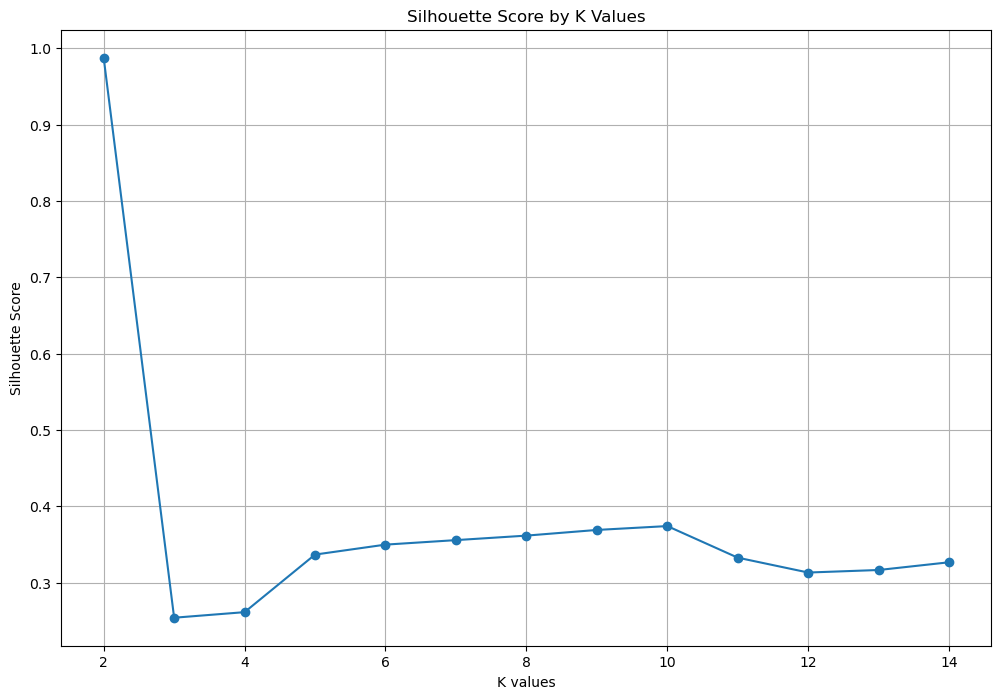

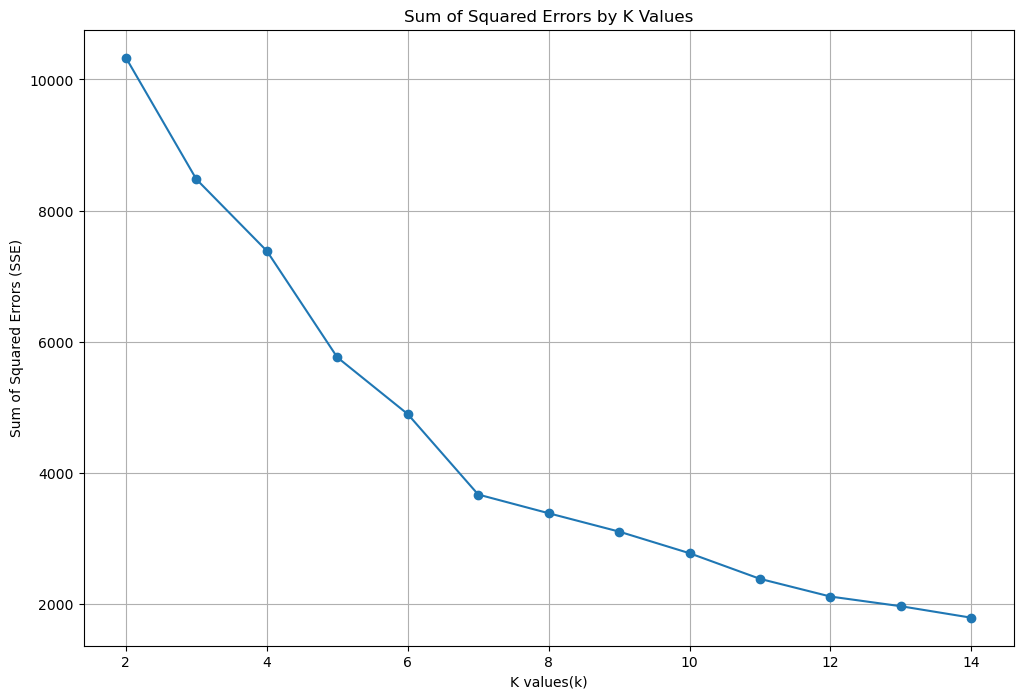

In [57]:
# Plot silhouette scores
plt.figure(figsize=(12, 8))
plt.plot(k_values, mean_silhouette_scores, marker ='o')
plt.xlabel("K values")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score by K Values")
plt.grid(True)
plt.show()

#plot the SSEs against K to evalueate elbow method
plt.figure(figsize=(12, 8))
plt.plot(k_values, sse_vals, marker='o')
plt.xlabel("K values(k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Sum of Squared Errors by K Values")
plt.grid(True)
plt.show()

In [58]:
#examine the sizes of these clusters when k = 2
kmeans = KMeans(n_clusters=2, max_iter=500, verbose=0, random_state=33)
clusters = kmeans.fit_predict(food_norm2_df)
#get cluster sizes - 
#function from class notes
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  1721
Size of Cluster 1 =  1


It looks like dropping all the categorical features didn't help us. In this case we used a standard scaler. It seems that the clustering algorithm isn't finding significant clusters. k = 2 with a sihlouette score of 99% seems high, and judging by the size analysis, it's because there was an early arbitrary division of the data. There may be a feature throwing off our alogirthm's ability to cluster, and it might be more apparent when there are fewer features. Next, we will try reducing the non-categorical features to see if we can improve our results. We will attempt this by listing feature importance using PCA.

In [60]:
#kMeans Data Preparation - 

#drop bad features and categorical ones, including healthscore.
food_drop2_df= food_df.drop(['id','title', 'ingredients', 'Alcohol/g', 'Caffeine/g', 'image', 
        'spoonacularSourceUrl', 'dishTypes', 'cuisines', 'gaps', 'spoonacularScore','healthScore','whole30', 'ketogenic', 'lowFodmap', 'veryPopular', 'veryHealthy',
             'sustainable', 'dairyFree', 'glutenFree', 'vegan', 'vegetarian'], axis=1)

food_numeric_drop2_df = food_drop2_df

#normalize the entire data frame Standard scaler. some of the values like the ones in magnesium are so small they go to 0 too quickly. - 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
food_norm2_df = scaler.fit_transform(food_numeric_drop2_df)

#print shape of food_norm_df - 
print("food_norm2_df shape:", food_norm2_df.shape)

#convert data back to pandas data frame and verify that categorical values are still 1 and 0 after scaling. - 
food_norm2_df = pd.DataFrame(food_norm2_df, columns=food_numeric_drop2_df.columns)
food_norm2_df


food_norm2_df shape: (1722, 37)


,pricePerServing,weightPerServing,readyInMinutes,aggregateLikes,percentProtein,percentFat,percentCarbs,calories,Fat/g,Saturated Fat/g,...,Magnesium/mg,Vitamin B12/µg,Vitamin B5/mg,Vitamin B6/mg,Vitamin E/mg,Fiber/g,Vitamin A/IU,Vitamin D/µg,Vitamin K/µg,Vitamin C/mg
0,-0.02,-0.03,-0.07,-0.18,0.71,-1.25,0.68,-0.02,-0.02,-0.02,...,-0.02,-0.03,-0.02,-0.03,-0.03,-0.04,-0.44,-0.03,-0.09,-0.03
1,-0.03,-0.03,-0.22,-0.22,0.53,-0.69,0.24,-0.03,-0.03,-0.02,...,-0.03,-0.03,-0.03,-0.03,-0.03,-0.04,-0.47,-0.03,-0.09,-0.03
2,-0.02,-0.02,-0.07,-0.22,-1.20,0.86,0.21,-0.02,-0.02,-0.02,...,-0.02,-0.03,-0.03,-0.03,0.00,-0.00,3.39,-0.03,-0.01,-0.03
3,-0.02,-0.02,-0.07,-0.06,0.14,0.74,-0.94,-0.02,-0.02,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.03,-0.43,-0.02,-0.08,-0.03
4,-0.03,-0.03,-0.29,-0.22,-0.95,-0.51,1.46,-0.03,-0.02,-0.02,...,-0.03,-0.03,-0.03,-0.03,-0.03,-0.04,-0.44,-0.03,-0.09,-0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,-0.02,-0.03,-0.17,-0.22,0.14,0.84,-1.04,-0.02,-0.02,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.03,-0.03,0.07,-0.03,-0.08,-0.03
1718,-0.03,-0.03,-0.11,-0.21,-1.16,-0.06,1.18,-0.03,-0.03,-0.02,...,-0.03,-0.03,-0.03,-0.03,-0.03,-0.04,-0.46,-0.03,-0.09,-0.03
1719,-0.03,-0.02,-0.07,-0.22,0.05,-0.72,0.74,-0.02,-0.02,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.03,-0.03,-0.26,-0.02,-0.08,-0.03
1720,-0.02,-0.02,-0.07,0.35,-0.03,-0.88,0.99,-0.02,-0.02,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.03,-0.01,1.52,-0.03,-0.06,-0.03


In [61]:
#apply PCA to the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=food_norm2_df.shape[1]) 
pca.fit(food_norm2_df)

PCA(n_components=37)

In [62]:
#compute feature importance across all 37 principle components
feature_importance = np.abs(pca.components_).sum(axis=0)

In [63]:
#list feature importance in descending order
importance_df = pd.DataFrame({'feature': food_norm2_df.columns, 'importance value': feature_importance})
importance_df = importance_df.sort_values(by='importance value', ascending=False)

#print
print("Feature importance")
print(importance_df.head(47))

Feature importance
             feature  importance value
9    Saturated Fat/g              4.23
8              Fat/g              4.08
25           Zinc/mg              4.01
15     Vitamin B3/mg              3.85
29     Vitamin B5/mg              3.85
19     Vitamin B2/mg              3.82
21     Vitamin B1/mg              3.70
12    Cholesterol/mg              3.67
30     Vitamin B6/mg              3.63
23      Potassium/mg              3.61
27      Magnesium/mg              3.58
16       Selenium/µg              3.56
17     Phosphorus/mg              3.50
7           calories              3.36
1   weightPerServing              3.29
28    Vitamin B12/µg              3.23
14         Protein/g              3.16
31      Vitamin E/mg              3.13
0    pricePerServing              3.01
18           Iron/mg              2.74
34      Vitamin D/µg              2.72
24         Copper/mg              2.61
22         Folate/µg              2.56
36      Vitamin C/mg              2.47
13    

In [64]:
#cumulative variance explained by each principal component (need to calculate the number of features for 80 % of the variance.)
explained_variance = np.cumsum(pca.explained_variance_ratio_)


In [65]:
#get the number of features required for 99% variance (I chose this arbitrarily) - 
#I chose 99 as it can keep a large amount of features
num_features = np.argmax(explained_variance >= 0.99) + 1 # add 1 because this function is finding the index of the first value in an array grtr or eql to 0.99
print(f"number of features that explain 99% of variance: {num_features}")

number of features that explain 99% of variance: 6


In [66]:
#run the kMeans classification again for top features
top_features = ['Saturated Fat/g', 'Fat/g', 'Zinc/mg', 'Vitamin B3/mg', 
                'Vitamin B5/mg', 'Vitamin B2/mg']

#drop bad features (keeping very popular and very healthy) (treating healthScore as target, so dropping it out)
food_drop1_df= food_df.drop(['id','title', 'ingredients', 'Alcohol/g', 'Caffeine/g', 'image', 
        'spoonacularSourceUrl', 'dishTypes', 'cuisines', 'gaps', 'spoonacularScore','healthScore'], axis=1)

#convert true false columns into numeric values 1s and 0s - 
boolean_cols = ['whole30', 'ketogenic', 'lowFodmap', 'veryPopular', 'veryHealthy',
             'sustainable', 'dairyFree', 'glutenFree', 'vegan', 'vegetarian']
food_drop1_df[boolean_cols] = food_drop1_df[boolean_cols].astype(int)
food_numeric_drop1_df = food_drop1_df

#normalize the entire data frame Standard scaler. some of the values like the ones in magnesium are so small they go to 0 too quickly. - 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
food_norm1_df = scaler.fit_transform(food_numeric_drop1_df)

#convert data back to pandas data frame - 
food_norm1_df = pd.DataFrame(food_norm1_df, columns=food_numeric_drop1_df.columns)

# Filter the dataset to include only top features
food_norm1_df = food_norm1_df[top_features]
food_norm1_df

,Saturated Fat/g,Fat/g,Zinc/mg,Vitamin B3/mg,Vitamin B5/mg,Vitamin B2/mg
0,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
1,-0.02,-0.03,-0.02,-0.02,-0.03,-0.02
2,-0.02,-0.02,-0.02,-0.02,-0.03,-0.02
3,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
4,-0.02,-0.02,-0.02,-0.03,-0.03,-0.02
...,...,...,...,...,...,...
1717,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
1718,-0.02,-0.03,-0.02,-0.03,-0.03,-0.03
1719,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
1720,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02


In [67]:
#experiment with different K values
k_values = list(range(2, 20)) 
mean_silhouette_scores = []
sse_vals = [] 

for k in k_values:
    #perform K-Means clustering
    kmeans = KMeans(n_clusters=k, max_iter=500, verbose=0, random_state=33)
    clusters = kmeans.fit_predict(food_norm1_df)
    sse_vals.append(kmeans.inertia_)

    #compute silhouette score
    silhouette_avg = metrics.silhouette_score(food_norm1_df, clusters)
    mean_silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")
    print(f"SSE for k={k}: {kmeans.inertia_:.3f}")
    


Silhouette Score for k=2: 0.999
SSE for k=2: 0.052
Silhouette Score for k=3: 0.954
SSE for k=3: 0.026
Silhouette Score for k=4: 0.716
SSE for k=4: 0.018
Silhouette Score for k=5: 0.639
SSE for k=5: 0.014
Silhouette Score for k=6: 0.471
SSE for k=6: 0.012
Silhouette Score for k=7: 0.411
SSE for k=7: 0.011
Silhouette Score for k=8: 0.322
SSE for k=8: 0.010
Silhouette Score for k=9: 0.321
SSE for k=9: 0.009
Silhouette Score for k=10: 0.323
SSE for k=10: 0.009
Silhouette Score for k=11: 0.324
SSE for k=11: 0.007
Silhouette Score for k=12: 0.325
SSE for k=12: 0.006
Silhouette Score for k=13: 0.327
SSE for k=13: 0.006
Silhouette Score for k=14: 0.325
SSE for k=14: 0.005
Silhouette Score for k=15: 0.319
SSE for k=15: 0.005
Silhouette Score for k=16: 0.320
SSE for k=16: 0.005
Silhouette Score for k=17: 0.320
SSE for k=17: 0.005
Silhouette Score for k=18: 0.314
SSE for k=18: 0.004
Silhouette Score for k=19: 0.314
SSE for k=19: 0.004


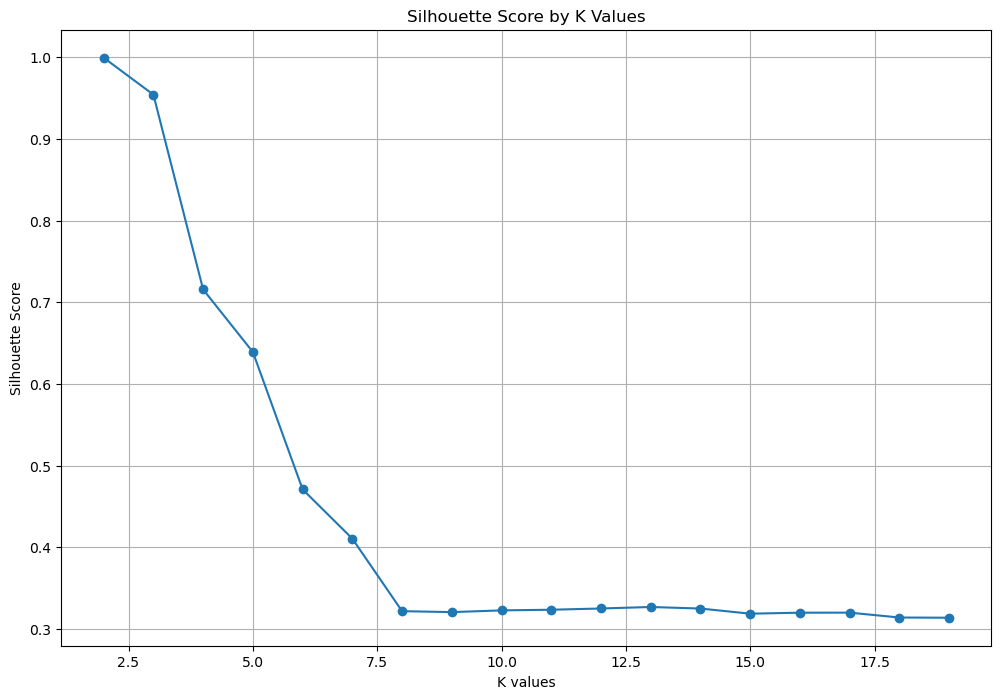

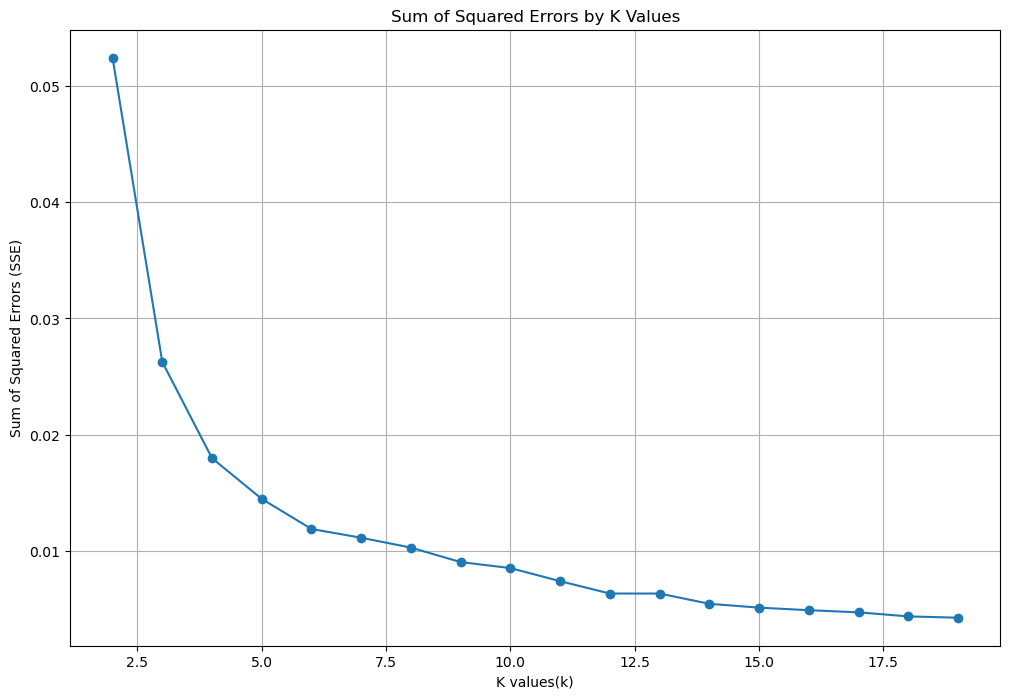

In [68]:
# Plot silhouette scores
plt.figure(figsize=(12, 8))
plt.plot(k_values, mean_silhouette_scores, marker ='o')
plt.xlabel("K values")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score by K Values")
plt.grid(True)
plt.show()

#plot the SSEs against K to evalueate elbow method
plt.figure(figsize=(12, 8))
plt.plot(k_values, sse_vals, marker='o')
plt.xlabel("K values(k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Sum of Squared Errors by K Values")
plt.grid(True)
plt.show()

In [69]:
#examine the sizes of these clusters when k = 4
kmeans = KMeans(n_clusters=4, max_iter=500, verbose=0, random_state=33)
clusters = kmeans.fit_predict(food_norm1_df)
#get cluster sizes - 
#function from class notes
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  1610
Size of Cluster 1 =  1
Size of Cluster 2 =  3
Size of Cluster 3 =  108


We cannot conclude anything based on the PCA features selected run above, the data appears to cluster without meaning or insight. There are extrmely low SSEs and very high sihlouette scores, but it appears that the clusters with the highest scores are very low and the size is not even distributed. For example, when we look at K = 4 above, we see very uneven cluster sizes

As such, for our next experiment we will evaluate different values of K on the data removing "very popular", "very healthy" and "health score" as these could all be potential targets

In [72]:
#kMeans Data Preparation - 

#drop bad features (boolean values) (treating healthScore,very popular, and very healthy as potential targets, so dropping it out)
food_drop1_df= food_df.drop(['id','title', 'ingredients', 'Alcohol/g', 'Caffeine/g', 'image', 
        'spoonacularSourceUrl', 'dishTypes', 'cuisines', 'gaps', 'spoonacularScore','healthScore','veryPopular','veryHealthy'], axis=1)

#convert true false columns into numeric values 1s and 0s - 
boolean_cols = ['whole30', 'ketogenic', 'lowFodmap',
             'sustainable', 'dairyFree', 'glutenFree', 'vegan', 'vegetarian']
food_drop1_df[boolean_cols] = food_drop1_df[boolean_cols].astype(int)
food_numeric_drop1_df = food_drop1_df

#normalize the entire data frame with a min max scaler so that we don't lose the categorical values (T/F remain 1 and 0) - 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
food_norm_df = scaler.fit_transform(food_numeric_drop1_df)

#print shape of food_norm_df - 
print("food_norm_df shape:", food_norm_df.shape)


food_norm_df shape: (1722, 45)


In [73]:
#convert data back to pandas data frame - 
food_norm_df = pd.DataFrame(food_norm_df, columns=food_numeric_drop1_df.columns)
food_norm_df

,pricePerServing,weightPerServing,vegetarian,vegan,glutenFree,dairyFree,sustainable,lowFodmap,ketogenic,whole30,...,Magnesium/mg,Vitamin B12/µg,Vitamin B5/mg,Vitamin B6/mg,Vitamin E/mg,Fiber/g,Vitamin A/IU,Vitamin D/µg,Vitamin K/µg,Vitamin C/mg
0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00
1718,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1719,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
1720,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00


In [74]:
food_norm_df.describe()

,pricePerServing,weightPerServing,vegetarian,vegan,glutenFree,dairyFree,sustainable,lowFodmap,ketogenic,whole30,...,Magnesium/mg,Vitamin B12/µg,Vitamin B5/mg,Vitamin B6/mg,Vitamin E/mg,Fiber/g,Vitamin A/IU,Vitamin D/µg,Vitamin K/µg,Vitamin C/mg
count,"1,722.00","1,722.00","1,722.00","1,722.00","1,722.00","1,722.00","1,722.00","1,722.00","1,722.00","1,722.00",...,"1,722.00","1,722.00","1,722.00","1,722.00","1,722.00","1,722.00","1,722.00","1,722.00","1,722.00","1,722.00"
mean,0.00,0.00,0.03,0.01,0.63,0.42,0.00,0.09,0.02,0.18,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
std,0.02,0.02,0.17,0.10,0.48,0.49,0.00,0.28,0.14,0.38,...,0.02,0.02,0.02,0.02,0.02,0.02,0.05,0.02,0.02,0.02
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [75]:
#experiment with different K values
k_values = list(range(2, 20)) 
mean_silhouette_scores = []
sse_vals = [] 

for k in k_values:
    #perform K-Means clustering
    kmeans = KMeans(n_clusters=k, max_iter=500, verbose=0, random_state=33)
    clusters = kmeans.fit_predict(food_norm_df)
    sse_vals.append(kmeans.inertia_)

    #compute silhouette score
    silhouette_avg = metrics.silhouette_score(food_norm_df, clusters)
    mean_silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")
    print(f"SSE for k={k}: {kmeans.inertia_:.3f}")
    


Silhouette Score for k=2: 0.360
SSE for k=2: 1148.701
Silhouette Score for k=3: 0.404
SSE for k=3: 778.641
Silhouette Score for k=4: 0.458
SSE for k=4: 586.504
Silhouette Score for k=5: 0.471
SSE for k=5: 528.431
Silhouette Score for k=6: 0.497
SSE for k=6: 464.488
Silhouette Score for k=7: 0.555
SSE for k=7: 359.275
Silhouette Score for k=8: 0.534
SSE for k=8: 339.010
Silhouette Score for k=9: 0.458
SSE for k=9: 317.272
Silhouette Score for k=10: 0.435
SSE for k=10: 308.033
Silhouette Score for k=11: 0.438
SSE for k=11: 276.780
Silhouette Score for k=12: 0.446
SSE for k=12: 254.486
Silhouette Score for k=13: 0.456
SSE for k=13: 233.786
Silhouette Score for k=14: 0.396
SSE for k=14: 217.523
Silhouette Score for k=15: 0.405
SSE for k=15: 200.287
Silhouette Score for k=16: 0.382
SSE for k=16: 189.253
Silhouette Score for k=17: 0.384
SSE for k=17: 182.470
Silhouette Score for k=18: 0.379
SSE for k=18: 178.426
Silhouette Score for k=19: 0.386
SSE for k=19: 159.126


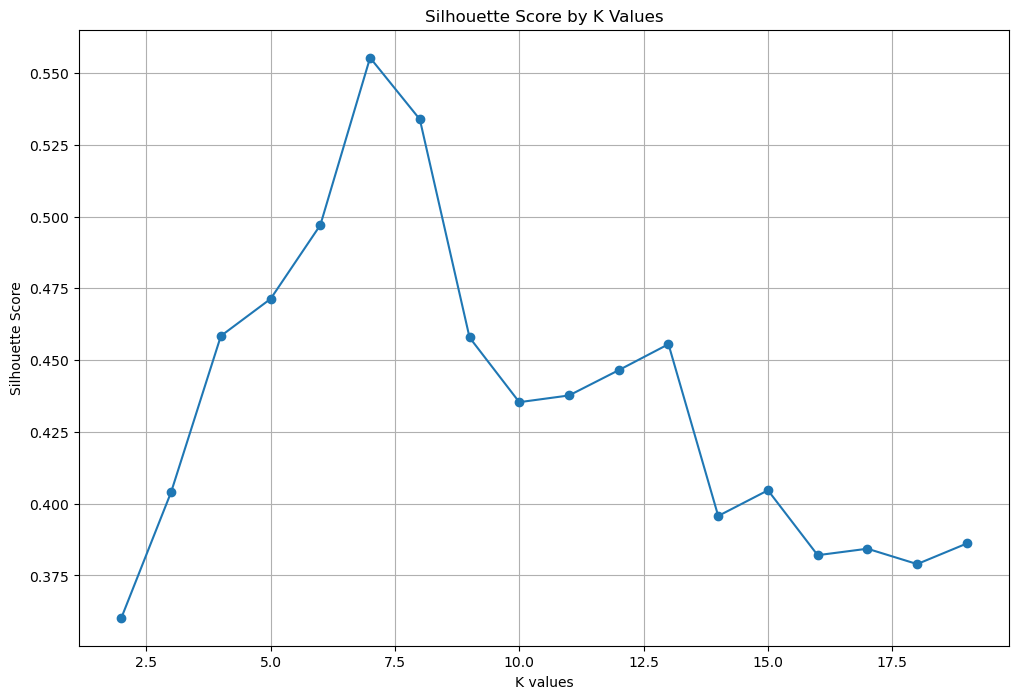

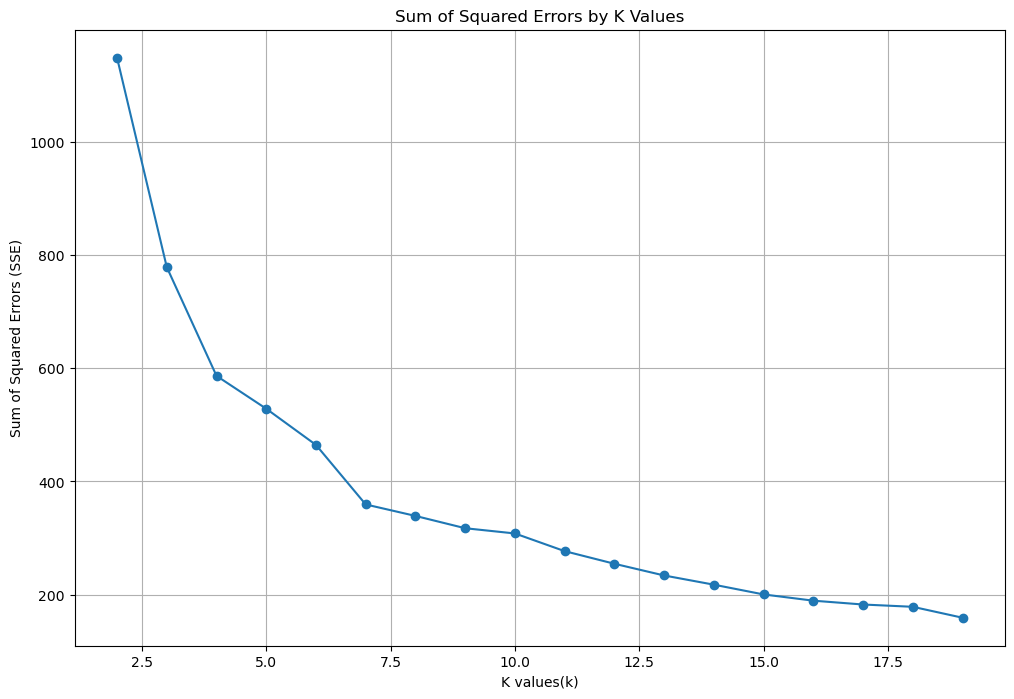

In [76]:
# Plot silhouette scores
plt.figure(figsize=(12, 8))
plt.plot(k_values, mean_silhouette_scores, marker ='o')
plt.xlabel("K values")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score by K Values")
plt.grid(True)
plt.show()

#plot the SSEs against K to evalueate elbow method
plt.figure(figsize=(12, 8))
plt.plot(k_values, sse_vals, marker='o')
plt.xlabel("K values(k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Sum of Squared Errors by K Values")
plt.grid(True)
plt.show()

In [77]:
#examine the sizes of these clusters when k = 5
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=0, random_state=33)
clusters = kmeans.fit_predict(food_norm_df)
#get cluster sizes - 
#function from class notes
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  572
Size of Cluster 1 =  245
Size of Cluster 2 =  404
Size of Cluster 3 =  422
Size of Cluster 4 =  79


K = 5 here looks pretty good reletively; and has a good distribution of cluster size. We see a small kick in the elbow and a sihlouette score above 0.5. Below we will visualize the sihlouette scores

In [79]:
#save the best performing kMeans dataset (food_k_means)
#kMeans Data Preparation - 

#drop bad features (boolean values) (treating healthScore,very popular, and very healthy as potential targets, so dropping it out)
food_drop1_df= food_df.drop(['id','title', 'ingredients', 'Alcohol/g', 'Caffeine/g', 'image', 
        'spoonacularSourceUrl', 'dishTypes', 'cuisines', 'gaps', 'spoonacularScore','healthScore','veryPopular','veryHealthy'], axis=1)

#convert true false columns into numeric values 1s and 0s - 
boolean_cols = ['whole30', 'ketogenic', 'lowFodmap',
             'sustainable', 'dairyFree', 'glutenFree', 'vegan', 'vegetarian']
food_drop1_df[boolean_cols] = food_drop1_df[boolean_cols].astype(int)
food_numeric_drop1_df = food_drop1_df

#normalize the entire data frame with a min max scaler so that we don't lose the categorical values (T/F remain 1 and 0) - 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
food_norm_df = scaler.fit_transform(food_numeric_drop1_df)

food_k_means_df = food_norm_df

#print shape of food_norm_df - 
print("food_k_means_df shape:", food_k_means_df.shape)


food_k_means_df shape: (1722, 45)


In [80]:
#perform first clustering run - 
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1, random_state=42)
kmeans.fit(food_k_means_df)
clusters = kmeans.predict(food_k_means_df)


Initialization complete
Iteration 0, inertia 640.6152392778664.
Iteration 1, inertia 472.7474019680216.
Iteration 2, inertia 472.7253804328947.
Converged at iteration 2: strict convergence.


In [81]:
#visualize the silhouette scores - 
#code from class
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    plt.show()
    
    return

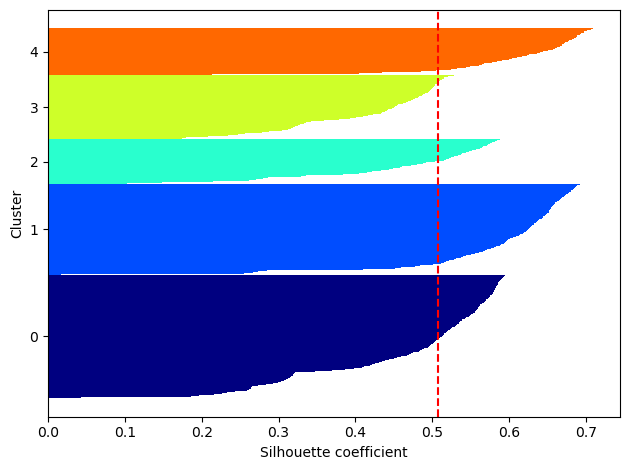

In [82]:
#visualize silhouette score results
plot_silhouettes(food_k_means_df, clusters)

In [83]:
#average silhouette coefficient accross clusters
silhouette_vals = metrics.silhouette_samples(food_k_means_df, clusters, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals)
print(silhouette_avg)

0.5072247023238643


In [84]:
#cluster labels
k_Means_Cluster_Labels =pd.DataFrame(clusters, columns=["Cluster"])
k_Means_Cluster_Labels

,Cluster
0,4
1,4
2,4
3,2
4,1
...,...
1717,0
1718,0
1719,1
1720,0


In [85]:
#display centroids - 
pd.options.display.float_format='{:,.2f}'.format

food_k_means_df = pd.DataFrame(food_k_means_df, columns=food_numeric_drop1_df.columns)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=food_k_means_df.columns)
centroids

,pricePerServing,weightPerServing,vegetarian,vegan,glutenFree,dairyFree,sustainable,lowFodmap,ketogenic,whole30,...,Magnesium/mg,Vitamin B12/µg,Vitamin B5/mg,Vitamin B6/mg,Vitamin E/mg,Fiber/g,Vitamin A/IU,Vitamin D/µg,Vitamin K/µg,Vitamin C/mg
0,0.00,0.00,0.04,0.00,1.00,-0.00,0.00,0.12,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
1,0.00,0.00,0.03,-0.00,-0.00,0.00,0.00,-0.00,0.01,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00
2,0.00,0.00,0.03,0.02,1.00,1.00,0.00,0.10,0.01,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
3,0.00,0.00,0.04,0.03,1.00,1.00,0.00,0.19,0.02,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
4,0.00,0.00,0.01,0.01,-0.00,1.00,0.00,0.00,0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00


In [86]:
# see all the centroid information without truncation
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.2f}'.format
centroids_transposed = centroids.T
centroids_transposed

,0,1,2,3,4
pricePerServing,0.00,0.00,0.00,0.00,0.00
weightPerServing,0.00,0.00,0.00,0.00,0.00
vegetarian,0.04,0.03,0.03,0.04,0.01
vegan,0.00,-0.00,0.02,0.03,0.01
glutenFree,1.00,-0.00,1.00,1.00,-0.00
dairyFree,-0.00,0.00,1.00,1.00,1.00
sustainable,0.00,0.00,0.00,0.00,0.00
lowFodmap,0.12,-0.00,0.10,0.19,0.00
ketogenic,0.04,0.01,0.01,0.02,0.00
whole30,0.01,-0.00,-0.00,1.00,-0.00


Further analysis on our clusters with the clustering centroids above shows us that gluten free, dairy free, and whole 30 drove many of our clustering assignments. These features may or may not be heavily affiliated with our potential target features. 

# Agglometrive Clustering

# Data Loading & Preprocessing
- We began by loading the dataset and converting categorical dietary attributes (vegetarian, glutenFree, sustainable, ketogenic) into binary numeric values for compatibility with clustering algorithms. This preprocessing ensured consistent numerical data representation.
- Successfully generated a modified dataset suitable for numerical analysis.

In [90]:
def load_and_preprocess(file_path):
    """
    Load the dataset, convert specified boolean columns to binary, and save a modified CSV.
    """
    df = pd.read_csv(file_path)
    
    # Convert boolean columns to binary (1 and 0)
    binary_columns = ['vegetarian', 'glutenFree', 'sustainable', 'ketogenic']
    df[binary_columns] = df[binary_columns].astype(int)
    
    # Save the modified dataset for record keeping
    df.to_csv("modified_dataset.csv", index=False)
    print("Modified dataset saved successfully with binary values!")
    return df


# Feature Selection By Correlation
- We calculated and visualized correlations between nutritional, dietary, and economic features using a heatmap. This helped identify key features contributing most effectively to distinguishing recipe healthiness.
- Selected an optimal subset of predictive features: Protein/g, Fat/g, Carbohydrates/g, Vitamin B3/mg, Calcium/mg, Sodium/mg, ketogenic, vegetarian, vegan, glutenFree, pricePerServing, weightPerServing.

In [92]:
def plot_correlation_heatmap(df, features, title_suffix=""):
    """
    Compute and plot the correlation heatmap of the given features.
    """
    df_features = df[features]
    correlation_matrix = df_features.corr()
    
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Heatmap of Selected Features {title_suffix}")
    plt.show()
    
    return correlation_matrix


# Scaling Data 
- We standardized the selected features with StandardScaler, ensuring equal contribution of each feature in distance-based clustering.
- Produced standardized data ready for clustering analysis.

In [94]:
def scale_data(df, features):
    """
    Scale the selected features using StandardScaler.
    Returns both the scaled numpy array and a DataFrame version.
    """
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(df[features])
    df_scaled = pd.DataFrame(scaled_array, columns=features)
    return scaled_array, df_scaled


# Agglomerative Clustering Experimentation
- We experimented systematically with different clustering configurations by varying distance metrics (Euclidean, Cosine, Manhattan) and linkage methods (Single, Complete, Average, Ward), along with the number of clusters (k ranging from 2 to 10). We evaluated cluster quality using silhouette scores and Davies-Bouldin indices.
- Identified Single Linkage with Euclidean distance as the optimal configuration based on the highest silhouette and lowest Davies-Bouldin scores.

In [96]:
def run_clustering(X, distance_metrics, linkage_methods, cluster_range):
    """
    Run agglomerative clustering across various distance metrics, linkage methods, 
    and numbers of clusters (k values). Evaluate each configuration using silhouette 
    and Davies-Bouldin scores.
    
    Returns:
        clustering_results: nested dict of configurations and evaluation metrics.
    """
    clustering_results = {}
    
    for metric in distance_metrics:
        clustering_results[metric] = {}
        for linkage_method in linkage_methods:
            # Ward linkage only works with Euclidean distance
            if linkage_method == "ward" and metric != "euclidean":
                continue
            
            for k in cluster_range:
                # Create a unique key for each (linkage, k) combination under the given metric
                config_key = f"{linkage_method}_k{k}"
                
                # For Ward linkage, the 'metric' parameter is ignored and Euclidean is used
                if linkage_method == "ward":
                    cluster_model = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
                else:
                    cluster_model = AgglomerativeClustering(n_clusters=k, metric=metric, linkage=linkage_method)
                
                # Fit clustering and obtain labels
                labels = cluster_model.fit_predict(X)
                
                # Evaluate clustering quality
                sil_score = silhouette_score(X, labels, metric=metric)
                db_score = davies_bouldin_score(X, labels)
                
                # Store results
                clustering_results[metric][config_key] = {
                    "linkage": linkage_method,
                    "n_clusters": k,
                    "labels": labels,
                    "silhouette_score": sil_score,
                    "davies_bouldin_score": db_score
                }
                print(f"Metric: {metric}, Linkage: {linkage_method}, k: {k} -> Silhouette: {sil_score:.4f}, DB: {db_score:.4f}")
    return clustering_results

def choose_best_configuration(clustering_results):
    """
    Choose the best clustering configuration based on the highest silhouette score.
    Returns a dictionary with the best metric, configuration key, and corresponding details.
    """
    best_config = {"metric": None, "config_key": None, "silhouette_score": -1}
    for metric, configs in clustering_results.items():
        for config_key, details in configs.items():
            if details["silhouette_score"] > best_config["silhouette_score"]:
                best_config = {
                    "metric": metric,
                    "config_key": config_key,
                    "linkage": details["linkage"],
                    "n_clusters": details["n_clusters"],
                    "labels": details["labels"],
                    "silhouette_score": details["silhouette_score"],
                    "davies_bouldin_score": details["davies_bouldin_score"]
                }
    print("\nBest Configuration:")
    print(best_config)
    return best_config


# Visualize Clustering Comparison
- We plotted silhouette and Davies-Bouldin scores for various configurations, clearly illustrating how different linkage and distance metric combinations performed across different cluster counts.
- Visually confirmed the optimal clustering configuration.

In [98]:
def visualize_clustering_results(clustering_results, cluster_range):
    """
    For each distance metric and linkage combination, extract and plot the silhouette
    and Davies-Bouldin scores as functions of k (number of clusters).
    """
    # Plot Silhouette Scores vs. k
    plt.figure(figsize=(14, 6))
    for metric, configs in clustering_results.items():
        linkage_groups = {}
        for config_key, details in configs.items():
            linkage = details["linkage"]
            k = details["n_clusters"]
            sil_score = details["silhouette_score"]
            if linkage not in linkage_groups:
                linkage_groups[linkage] = {"k": [], "sil": []}
            linkage_groups[linkage]["k"].append(k)
            linkage_groups[linkage]["sil"].append(sil_score)
        for linkage, data in linkage_groups.items():
            sorted_indices = np.argsort(data["k"])
            sorted_k = np.array(data["k"])[sorted_indices]
            sorted_sil = np.array(data["sil"])[sorted_indices]
            plt.plot(sorted_k, sorted_sil, marker='o', label=f"{metric} - {linkage}")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    # Plot Davies-Bouldin Scores vs. k
    plt.figure(figsize=(14, 6))
    for metric, configs in clustering_results.items():
        linkage_groups = {}
        for config_key, details in configs.items():
            linkage = details["linkage"]
            k = details["n_clusters"]
            db_score = details["davies_bouldin_score"]
            if linkage not in linkage_groups:
                linkage_groups[linkage] = {"k": [], "db": []}
            linkage_groups[linkage]["k"].append(k)
            linkage_groups[linkage]["db"].append(db_score)
        for linkage, data in linkage_groups.items():
            sorted_indices = np.argsort(data["k"])
            sorted_k = np.array(data["k"])[sorted_indices]
            sorted_db = np.array(data["db"])[sorted_indices]
            plt.plot(sorted_k, sorted_db, marker='o', label=f"{metric} - {linkage}")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Davies-Bouldin Score (Lower is Better)")
    plt.title("Davies-Bouldin Score vs. Number of Clusters")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# Plot Dendrogram for All Linkages (Truncated)


In [100]:
def plot_dendrogram_for_all_linkages(X, metric='euclidean'):
    """
    Plots four dendrograms side by side (2x2) for single, complete, average, and ward linkages.
    By default, uses the provided 'metric' for all except 'ward', which requires Euclidean.
    """
    linkages = ["single", "complete", "average", "ward"]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for i, linkage_method in enumerate(linkages):
        if linkage_method == "ward":
            used_metric = "euclidean"
        else:
            used_metric = metric
        
        Z = sch_linkage(X, method=linkage_method, metric=used_metric)
        
        dendrogram(
            Z, 
            truncate_mode="level",   # Truncated view
            p=5,                     # Display top 5 levels
            ax=axes[i],
            show_leaf_counts=True
        )
        
        axes[i].set_title(f"Dendrogram (Linkage: {linkage_method}, Metric: {used_metric})")
        axes[i].set_xlabel("Data Points")
        axes[i].set_ylabel("Distance")

    plt.tight_layout()
    plt.show()


# Plot Full Dendrogram using Best Configuration (No Truncation
- Initially, truncated dendrograms provided a quick visual comparison of hierarchical structures across linkage methods. The best configuration (Single Linkage–Euclidean) was then visualized with a complete dendrogram, choosing a meaningful cut-off distance (5) for clustering.
- Confirmed natural and interpretable clusters through dendrogram visualization.

In [102]:
def plot_full_dendrogram_best(X, best_config, cut_height=None):
    """
    Generate a full (untruncated) dendrogram using the best clustering configuration.
    Optionally, draw a horizontal line at 'cut_height' to show a potential cluster cut.
    This dendrogram displays all 1,722 leaves.
    """
    linkage_method = best_config["linkage"]
    metric = best_config["metric"]
    
    if linkage_method == "ward" or metric != "euclidean":
        print("Using Euclidean distance for full dendrogram (required for Ward).")
        linkage_metric = "euclidean"
    else:
        linkage_metric = metric

    Z = sch_linkage(X, method=linkage_method, metric=linkage_metric)
    
    plt.figure(figsize=(20, 10))  # Wide figure to accommodate many leaves
    dendrogram(Z)
    plt.title(f"Full Dendrogram (Linkage: {linkage_method}, Metric: {linkage_metric})")
    plt.xlabel("Data Points (All 1722 Rows)")
    plt.ylabel("Distance")
    
    if cut_height is not None:
        plt.axhline(y=cut_height, color='red', linestyle='--', label=f'Cut at {cut_height}')
        plt.legend()
    plt.show()


# Additional Analysis (Feature Importance, PCA, t-SNE)
- Conducted additional analyses including Random Forest feature importance, Principal Component Analysis (PCA), mutual information scores, and t-SNE visualization to further validate and interpret clusters.
- Highlighted critical features influencing food healthiness and visually confirmed distinct clusters, reinforcing clustering outcomes.

In [104]:
def additional_analysis(df_scaled, features, labels):
    """
    Run additional analyses:
      - Random Forest feature importance,
      - PCA explained variance,
      - Mutual Information,
      - t-SNE visualization.
    """
    X = df_scaled[features]
    y = labels
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    feature_importances = rf_model.feature_importances_
    importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)
    print("Top 10 Features Based on Random Forest Importance:")
    print(importance_df.head(10))
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df)
    plt.title("Feature Importances (Random Forest)")
    plt.show()
    
    pca = PCA(n_components=5)
    pca.fit(df_scaled)
    explained_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance)
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("PCA Explained Variance")
    plt.show()
    print("PCA Components:")
    print(pd.DataFrame(pca.components_, columns=features))
    
    mi_scores = mutual_info_classif(df_scaled, y)
    mi_df = pd.DataFrame({"Feature": features, "Mutual Information": mi_scores})
    mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)
    print("Top 10 Features Based on Mutual Information:")
    print(mi_df.head(10))
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Mutual Information", y="Feature", data=mi_df)
    plt.title("Mutual Information Between Features and Cluster Labels")
    plt.show()
    
    pca_tsne = PCA(n_components=10)
    X_pca = pca_tsne.fit_transform(df_scaled)
    tsne = TSNE(n_components=2, perplexity=10, learning_rate=5, max_iter=20000, random_state=42)
    tsne_results = tsne.fit_transform(X_pca)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=y, palette="viridis", s=50, alpha=0.8)
    plt.title("t-SNE Visualization")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend(title="Cluster Label", bbox_to_anchor=(1, 1), loc="upper left")
    plt.show()


# Main Function
- Overall, the comprehensive approach using agglomerative clustering, supported by multiple visualization and analytical methods, provided clear and interpretable insights into recipe groupings and nutritional characteristics.

### note: the dataset used here is a preprocessed data set that has dropped the following features: 
'id', 'url', 'title', 'ingredients', 'Alcohol/g', 'Caffeine/g', 'image', 
        'spoonacularSourceUrl', 'dishTypes', 'cuisines', 'gaps', 'veryHealthy', 'veryPopular'

Modified dataset saved successfully with binary values!
Plotting initial correlation heatmap...


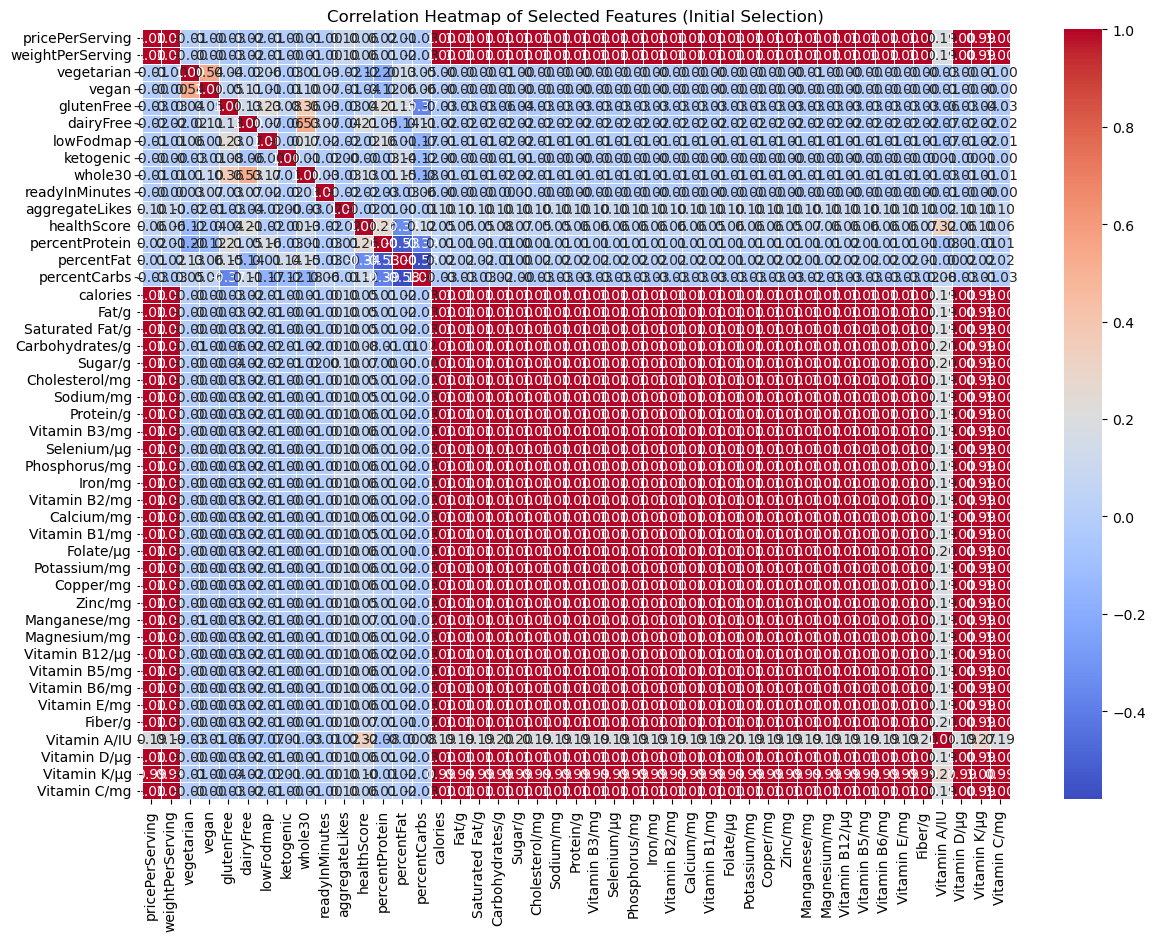


Updated selected features based on correlation analysis and domain justification:
['Protein/g', 'Fat/g', 'Carbohydrates/g', 'Vitamin B3/mg', 'Calcium/mg', 'Sodium/mg', 'ketogenic', 'vegetarian', 'vegan', 'glutenFree', 'pricePerServing', 'weightPerServing']

Plotting updated correlation heatmap...


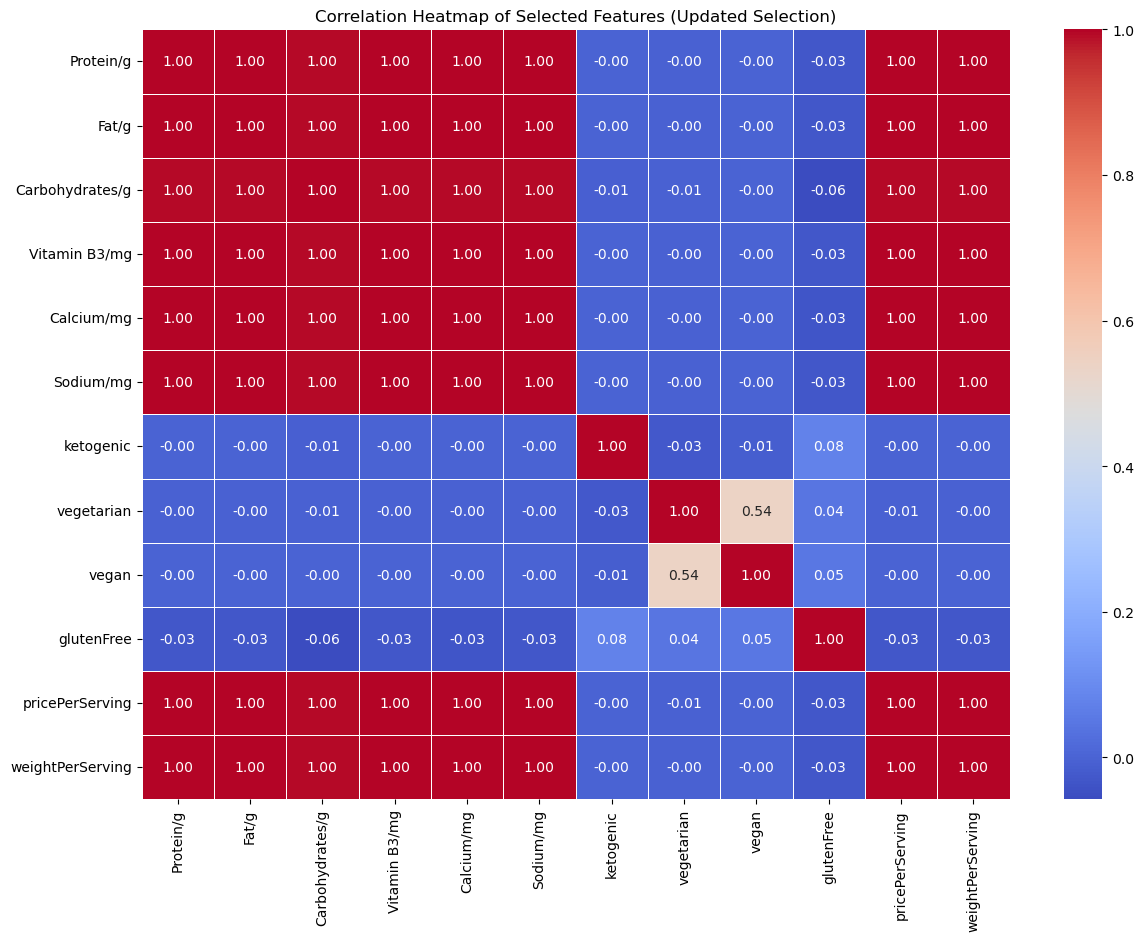


Plotting truncated dendrograms for all linkage methods...


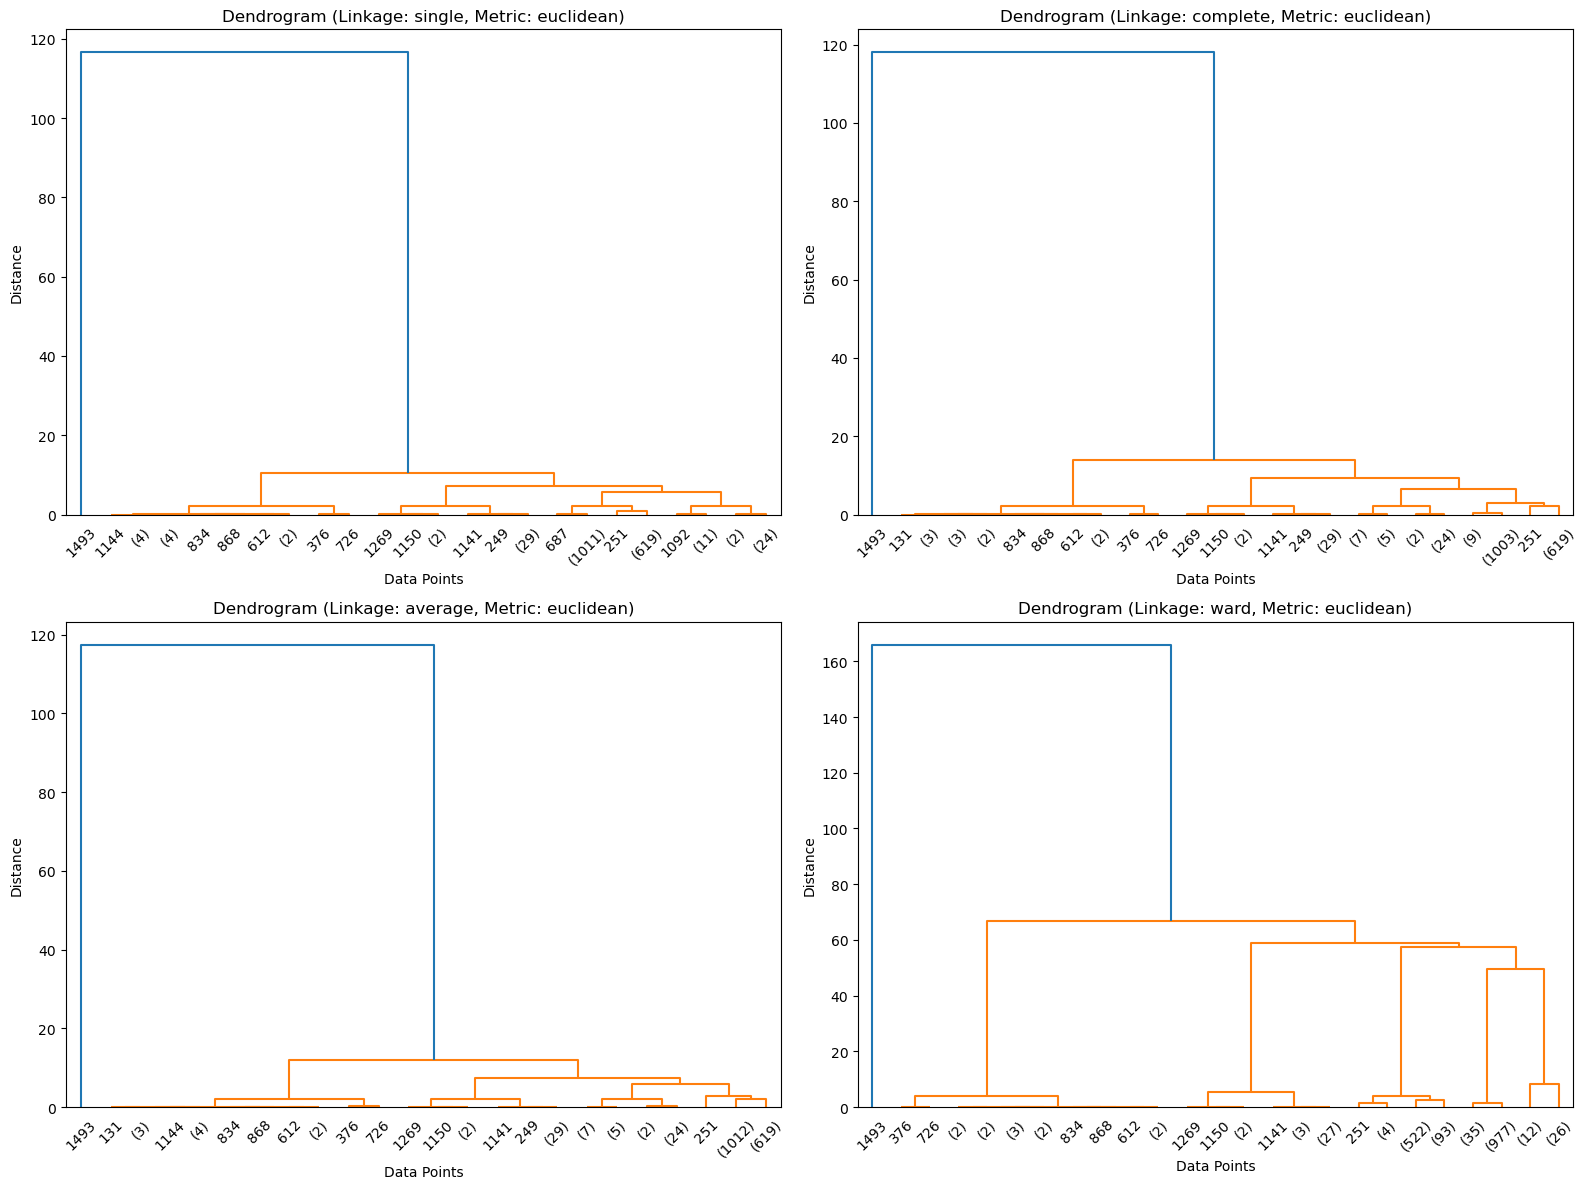


Running agglomerative clustering experiments...
Metric: euclidean, Linkage: single, k: 2 -> Silhouette: 0.9853, DB: 0.0114
Metric: euclidean, Linkage: single, k: 3 -> Silhouette: 0.8777, DB: 0.0980
Metric: euclidean, Linkage: single, k: 4 -> Silhouette: 0.8369, DB: 0.1416
Metric: euclidean, Linkage: single, k: 5 -> Silhouette: 0.8325, DB: 0.1977
Metric: euclidean, Linkage: single, k: 6 -> Silhouette: 0.8327, DB: 0.1733
Metric: euclidean, Linkage: single, k: 7 -> Silhouette: 0.8338, DB: 0.1600
Metric: euclidean, Linkage: single, k: 8 -> Silhouette: 0.8316, DB: 0.1234
Metric: euclidean, Linkage: single, k: 9 -> Silhouette: 0.9690, DB: 0.0353
Metric: euclidean, Linkage: complete, k: 2 -> Silhouette: 0.9853, DB: 0.0114
Metric: euclidean, Linkage: complete, k: 3 -> Silhouette: 0.8777, DB: 0.0980
Metric: euclidean, Linkage: complete, k: 4 -> Silhouette: 0.8369, DB: 0.1416
Metric: euclidean, Linkage: complete, k: 5 -> Silhouette: 0.8325, DB: 0.1977
Metric: euclidean, Linkage: complete, k: 6 

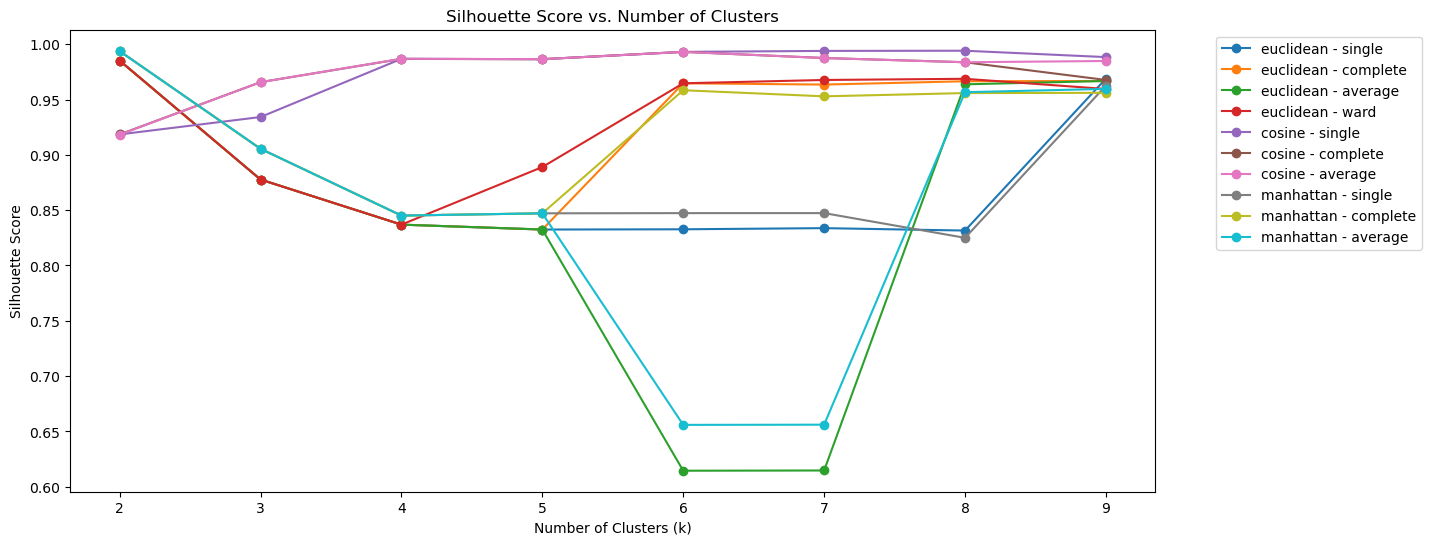

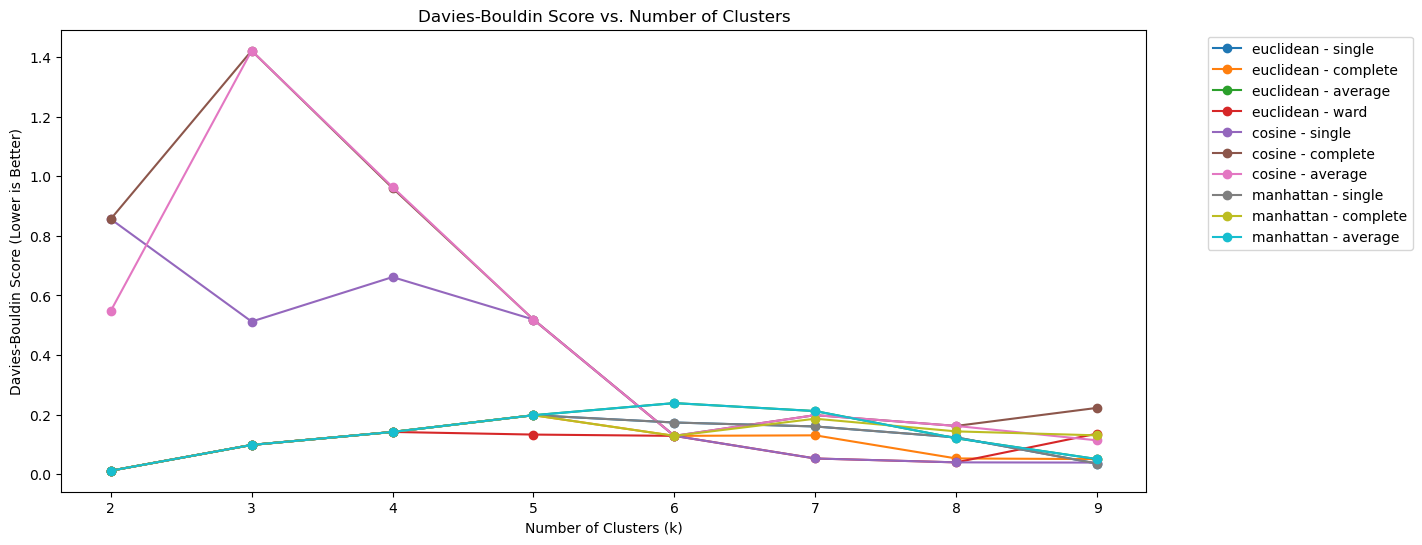


Best Configuration:
{'metric': 'cosine', 'config_key': 'single_k8', 'linkage': 'single', 'n_clusters': 8, 'labels': array([0, 0, 0, ..., 0, 1, 1]), 'silhouette_score': 0.9941622401359512, 'davies_bouldin_score': 0.03942530619361777}

Plotting FULL dendrogram (no truncation) based on best configuration...
Using Euclidean distance for full dendrogram (required for Ward).


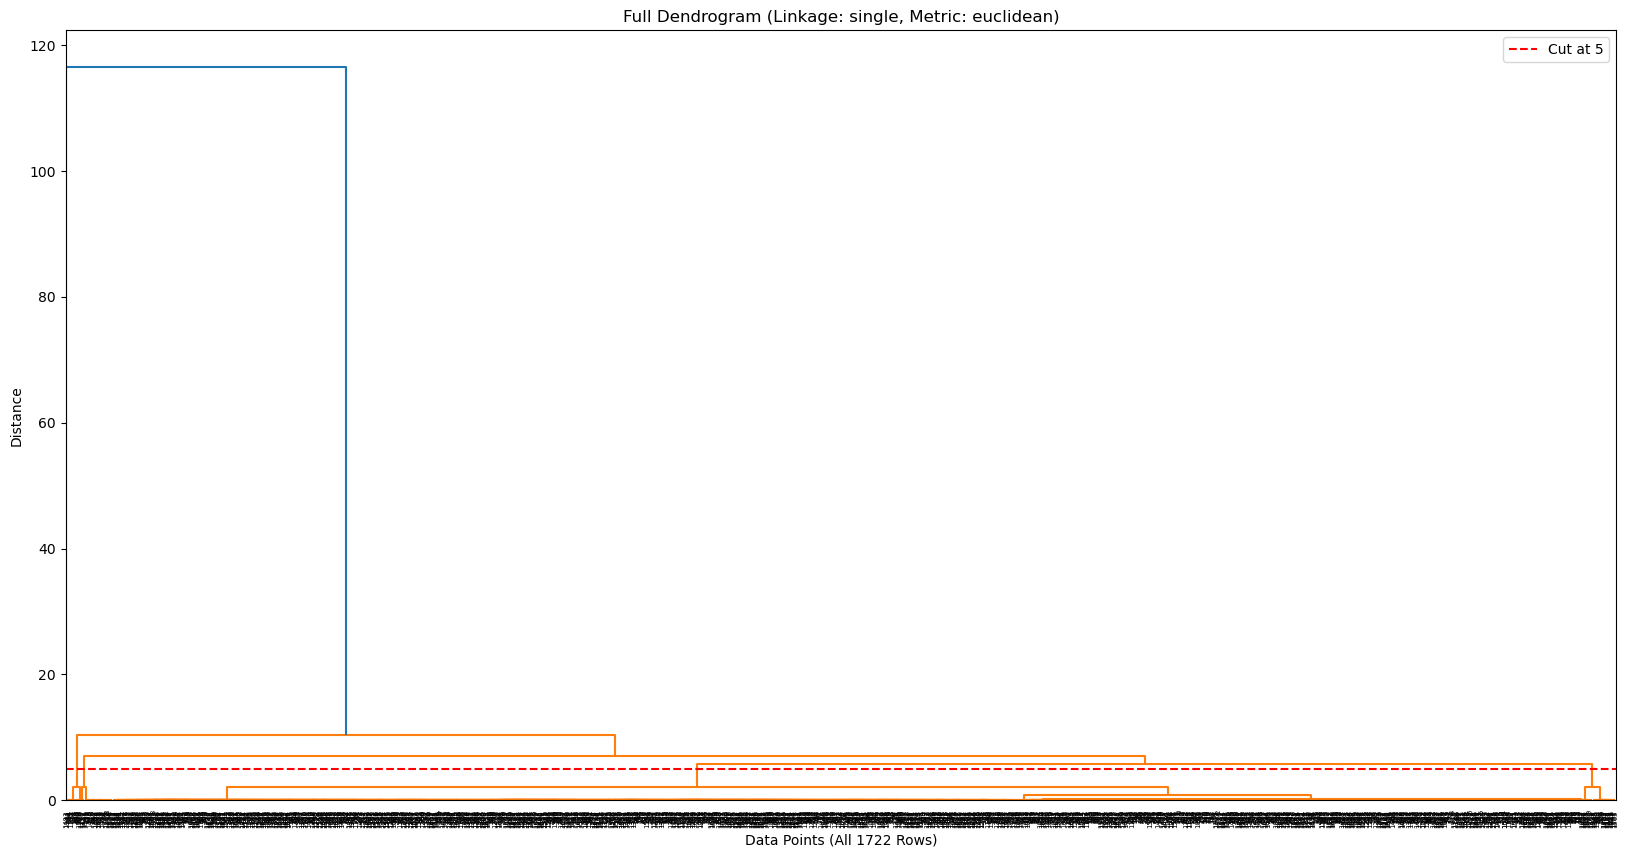


Running additional analyses (feature importance, PCA, mutual information, t-SNE)...
Top 10 Features Based on Random Forest Importance:
             Feature  Importance
9         glutenFree        0.70
2    Carbohydrates/g        0.06
7         vegetarian        0.06
6          ketogenic        0.05
10   pricePerServing        0.02
4         Calcium/mg        0.02
11  weightPerServing        0.02
8              vegan        0.02
3      Vitamin B3/mg        0.01
5          Sodium/mg        0.01


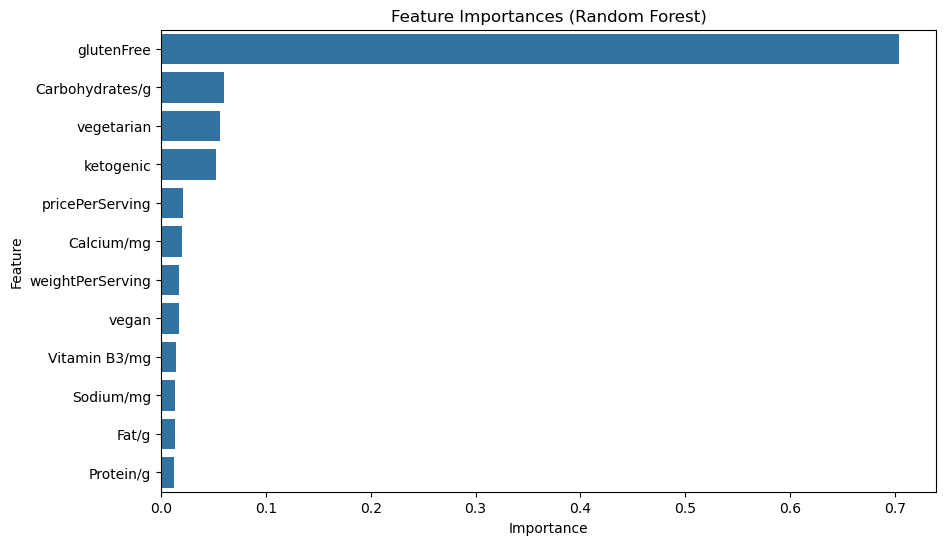

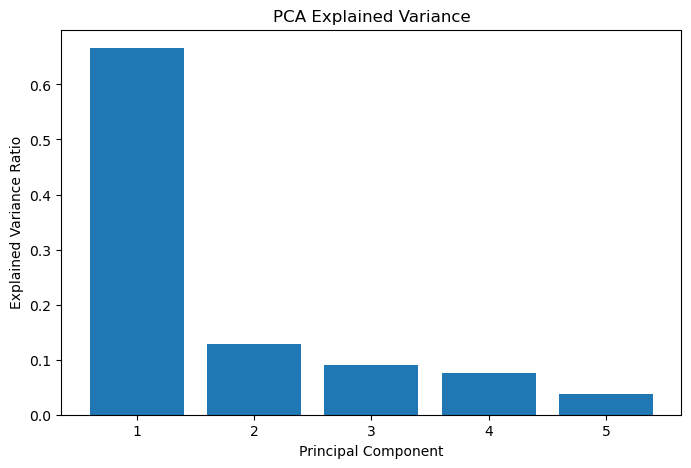

PCA Components:
   Protein/g  Fat/g  Carbohydrates/g  Vitamin B3/mg  Calcium/mg  Sodium/mg  \
0       0.35   0.35             0.35           0.35        0.35       0.35   
1       0.00   0.00            -0.00           0.00        0.00       0.00   
2       0.01   0.01            -0.01           0.01        0.00       0.01   
3       0.01   0.01            -0.01           0.01        0.00       0.01   
4      -0.00  -0.00             0.00          -0.00       -0.00      -0.00   

   ketogenic  vegetarian  vegan  glutenFree  pricePerServing  weightPerServing  
0      -0.00       -0.00  -0.00       -0.01             0.35              0.35  
1      -0.04        0.70   0.70        0.11             0.00              0.00  
2       0.72       -0.05  -0.02        0.69             0.01              0.01  
3      -0.69       -0.07  -0.08        0.72             0.01              0.01  
4      -0.01       -0.71   0.71       -0.01             0.00             -0.00  
Top 10 Features Based on Mutu

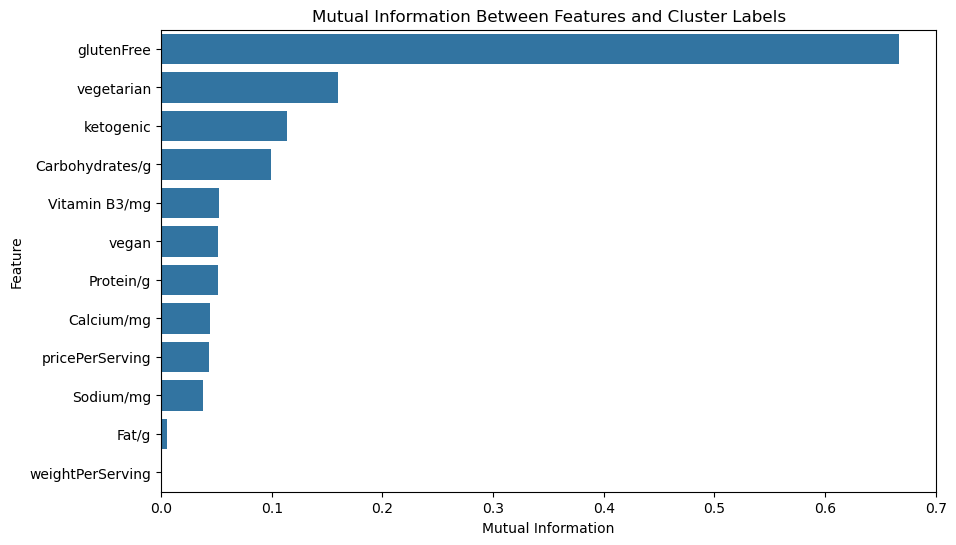

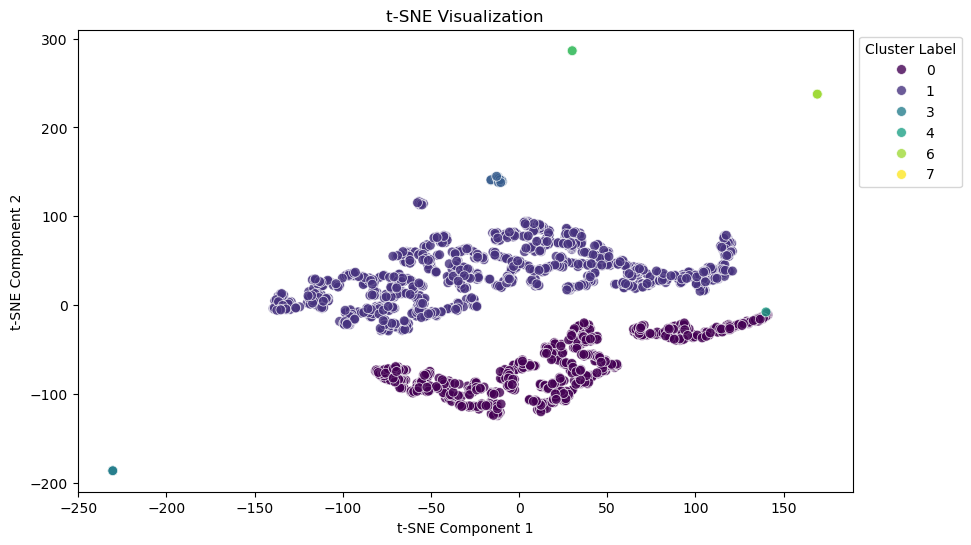

In [109]:
def main():
    file_path = '/Users/nicole.r.frank/Documents/Top_Drawer/MS_Artificial_Intelligence_DePaul_University/Classes/DSC_478_Programming_Machine_Learning_Applications/DSC_478_Final_Project/Final_Code/newfoodedit1.csv'
    
    # Step 1: Load and preprocess data
    df = load_and_preprocess(file_path)
    
    # Initial feature set (based on domain knowledge)
    initial_selected_features = [
        'pricePerServing', 'weightPerServing', 'vegetarian', 'vegan',
        'glutenFree', 'dairyFree', 'lowFodmap', 'ketogenic',
        'whole30', 'readyInMinutes', 'aggregateLikes',
        'healthScore', 'percentProtein', 'percentFat', 'percentCarbs',
        'calories', 'Fat/g', 'Saturated Fat/g', 'Carbohydrates/g', 'Sugar/g',
        'Cholesterol/mg', 'Sodium/mg', 'Protein/g', 'Vitamin B3/mg',
        'Selenium/µg', 'Phosphorus/mg', 'Iron/mg', 'Vitamin B2/mg',
        'Calcium/mg', 'Vitamin B1/mg', 'Folate/µg', 'Potassium/mg', 'Copper/mg',
        'Zinc/mg', 'Manganese/mg', 'Magnesium/mg', 'Vitamin B12/µg',
        'Vitamin B5/mg', 'Vitamin B6/mg', 'Vitamin E/mg', 'Fiber/g',
        'Vitamin A/IU', 'Vitamin D/µg', 'Vitamin K/µg', 'Vitamin C/mg'
    ]
    
    print("Plotting initial correlation heatmap...")
    _ = plot_correlation_heatmap(df, initial_selected_features, title_suffix="(Initial Selection)")
    
    # Updated feature set based on domain justification
    updated_selected_features = [
        "Protein/g", "Fat/g", "Carbohydrates/g", "Vitamin B3/mg", "Calcium/mg", "Sodium/mg",
        "ketogenic", "vegetarian", "vegan", "glutenFree", "pricePerServing", "weightPerServing"
    ]
    print("\nUpdated selected features based on correlation analysis and domain justification:")
    print(updated_selected_features)
    
    print("\nPlotting updated correlation heatmap...")
    _ = plot_correlation_heatmap(df, updated_selected_features, title_suffix="(Updated Selection)")
    
    # Step 3: Scale data
    X_array, df_scaled = scale_data(df, updated_selected_features)
    
    # Step 4: Plot truncated dendrograms for visual comparison of all linkage methods
    print("\nPlotting truncated dendrograms for all linkage methods...")
    plot_dendrogram_for_all_linkages(X_array, metric="euclidean")
    
    # Step 5: Run clustering experiments
    distance_metrics = ["euclidean", "cosine", "manhattan"]
    linkage_methods = ["single", "complete", "average", "ward"]
    cluster_range = range(2, 10)
    
    print("\nRunning agglomerative clustering experiments...")
    clustering_results = run_clustering(X_array, distance_metrics, linkage_methods, cluster_range)
    
    print("\nVisualizing clustering comparison across configurations...")
    visualize_clustering_results(clustering_results, cluster_range)
    
    best_config = choose_best_configuration(clustering_results)
    
    # Step 6: Plot full (untruncated) dendrogram with a horizontal cut line
    chosen_cut_height = 5  # Adjust this value as needed based on your dendrogram structure
    print("\nPlotting FULL dendrogram (no truncation) based on best configuration...")
    plot_full_dendrogram_best(X_array, best_config, cut_height=chosen_cut_height)
    
    # Step 7: Run additional analyses (feature importance, PCA, mutual information, t-SNE)
    print("\nRunning additional analyses (feature importance, PCA, mutual information, t-SNE)...")
    additional_analysis(df_scaled, updated_selected_features, best_config["labels"])

if __name__ == '__main__':
    main()

# KNN Classification Trial

In [114]:
# Changing healthscore to categorical
food_modified_df.loc[food_modified_df['healthScore'] <= 30, 'healthScore'] = 0   # not healthy 
food_modified_df.loc[food_modified_df['healthScore'] > 30, 'healthScore'] = 1   #  healthy
food_modified_df['healthScore'].astype(int)

0       0
1       0
2       1
3       1
4       0
       ..
1717    0
1718    0
1719    0
1720    1
1721    0
Name: healthScore, Length: 1722, dtype: int64

We seperated heatlhscore into healthy and not healthy; choosing the score = 30 as the determining factor because we found that in the distribution of this feature the mean was 30.

In [116]:
# Separate the target array
model_data = food_modified_df.drop(['healthScore'],axis=1)
target = food_modified_df['healthScore']

In [117]:
# Split the data
training_data, test_data, training_target, test_target = train_test_split(model_data, target, test_size=0.2, random_state=5)

In [153]:
# Normalizing the data
min_max_scaler = preprocessing.MinMaxScaler().fit(training_data)
training_data_norm = min_max_scaler.transform(training_data)
test_data_norm = min_max_scaler.transform(test_data)
np.set_printoptions(precision=2, linewidth=80, suppress=True)

In [154]:
# Ran KNN classifier using K=10
n_neighbors = 10
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(training_data_norm, training_target)
knnpreds_test = knnclf.predict(test_data_norm)
knncm = confusion_matrix(test_target, knnpreds_test)

In [155]:
# Classification report
print(classification_report(test_target, knnpreds_test))

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       179
         1.0       0.80      0.73      0.76       166

    accuracy                           0.78       345
   macro avg       0.78      0.78      0.78       345
weighted avg       0.78      0.78      0.78       345



In [156]:
# Model accuracy for training data
print (knnclf.score(training_data_norm, training_target))

1.0


In [157]:
# Model accuracy for testing data
print (knnclf.score(test_data_norm, test_target))

0.782608695652174


With very little preprocessing we were able to get an accuracy score of 0.78; we are wondering if we will be able to improve the score with more tuning.

## PCA

In [160]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio (how much variance is explained by each component)
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Transform the data to the new principal components
pca_data = pca.transform(scaled_data)
print("PCA data:", pca_data)

# Number of components
n_components = pca.n_components_
print("Number of components:", n_components)

Explained variance ratio: [0.33 0.11 0.06 0.05 0.04 0.04 0.03 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]
PCA data: [[-1.07 -1.09 -0.92 ...  0.   -0.    0.  ]
 [ 0.17 -0.31 -0.35 ...  0.   -0.    0.  ]
 [ 2.6  -2.67 -2.06 ...  0.   -0.    0.  ]
 ...
 [-3.69 -0.8   1.04 ...  0.   -0.    0.  ]
 [-1.18 -2.29 -2.01 ...  0.   -0.    0.  ]
 [-0.62 -1.91 -0.08 ...  0.   -0.    0.  ]]
Number of components: 46


Played around with number of components and found that 2 was ideal.

In [162]:
# Training PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(model_data)
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

In [163]:
pca_train, pca_test, pca_train_target, pca_test_target = train_test_split(X_pca, target, test_size=0.2, random_state=42)

In [164]:
# Apply KNN classifier
pca_knn = neighbors.KNeighborsClassifier(n_neighbors=5)
pca_knn.fit(pca_train, pca_train_target)

# Predict the labels of the test data
pca_knn_pred = pca_knn.predict(pca_test)

# Calculate the accuracy of the classifier
accuracy = pca_knn.score(pca_test, pca_test_target)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.69


In [165]:
# Classification report
print(classification_report(pca_test_target, pca_knn_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73       211
         1.0       0.59      0.69      0.63       134

    accuracy                           0.69       345
   macro avg       0.68      0.69      0.68       345
weighted avg       0.70      0.69      0.69       345



The PCA performed worse than the un-tuned model with a score of 0.69 versus 0.78.

## Feature Section

In [168]:
# Standardize the features
scaler = StandardScaler()
fs_scaled = scaler.fit_transform(training_data)

In [169]:
# Create a logistic regression model
model = LogisticRegression()

# Perform forward selection
sfs_forward = SequentialFeatureSelector(model, direction='forward', n_features_to_select=3, scoring='accuracy')
sfs_forward.fit(fs_scaled, training_target)

# Print column names of selected features (forward selection)
selected_features_forward = sfs_forward.get_support(indices=True)
print("Selected features (forward):")
print(model_data.columns[selected_features_forward])
selected_features_forward

Selected features (forward):
Index(['Potassium/mg', 'Magnesium/mg', 'Vitamin K/µg'], dtype='object')


array([31, 35, 43])

In [170]:
fs_data = model_data[model_data.columns[selected_features_forward]]
fs_data

,Potassium/mg,Magnesium/mg,Vitamin K/µg
0,778.81,73.36,0.00
1,103.37,12.62,7.18
2,848.60,122.71,104.27
3,"1,875.89",187.05,16.02
4,52.96,13.64,2.21
...,...,...,...
1717,972.64,61.78,9.61
1718,83.39,4.91,2.26
1719,846.11,65.10,8.64
1720,"1,722.77",177.20,44.11


Played around with number of features (1 - 10) and found that 3 was ideal. 

In [172]:
fs_train, fs_test, fs_train_target, fs_test_target = train_test_split(fs_data, target, test_size=0.2, random_state=42)

In [173]:
# Apply KNN classifier
fs_knn = neighbors.KNeighborsClassifier(n_neighbors=5)
fs_knn.fit(fs_train, fs_train_target)

# Predict the labels of the test data
fs_knn_pred = fs_knn.predict(fs_test)

# Calculate the accuracy of the classifier
fs_accuracy = fs_knn.score(fs_test, fs_test_target)
print(f"Accuracy: {fs_accuracy:.2f}")

Accuracy: 0.82


In [174]:
# Classification report
print(classification_report(fs_test_target, fs_knn_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85       211
         1.0       0.74      0.84      0.78       134

    accuracy                           0.82       345
   macro avg       0.81      0.82      0.81       345
weighted avg       0.83      0.82      0.82       345



Was able to get a higher accuracy with a lot fewer features. We thought our model had a lot of noise, and that Magnesium, Potassium, and Vitamin K/µg, were the most important features.

# Decision Tree Classification with Cluster Labels from K-Means


In the following segement we will use cluster labels from K-Means analysis to determine whether those naturally forming groups are indicitive of food health.

In [178]:
# Creating dataframe of cluster labels
cluster_df = k_Means_Cluster_Labels.merge(food_modified_df[['healthScore']], left_index=True, right_index=True)

# Changing them to dummy variables
cluster_df = pd.get_dummies(cluster_df , columns=['Cluster']).astype(int)

# Renaming columns
cluster_df = cluster_df.rename(columns={
    'healthScore': 'healthy',
    'Cluster_0': 'glutenFree',
    'Cluster_1': 'control_group',
    'Cluster_2': 'glutenFree_dairyFree',
    'Cluster_3': 'glutenFree_dairyFree_whole30',
    'Cluster_4': 'dairyFree'
})

cluster_df

,healthy,glutenFree,control_group,glutenFree_dairyFree,glutenFree_dairyFree_whole30,dairyFree
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,1,0,0,0,0,1
3,1,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1717,0,1,0,0,0,0
1718,0,1,0,0,0,0
1719,0,0,1,0,0,0
1720,1,1,0,0,0,0


In [179]:
cluster_target = cluster_df['healthy']
cluster_df = cluster_df.drop(columns=['healthy'])

In [180]:
# Split the data - Alexandria
cluster_training_data, cluster_test_data, cluster_training_target, cluster_test_target = train_test_split(cluster_df, 
                                                                                                  cluster_target, test_size=0.2, random_state=5)

In [181]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

In [182]:
# Creating and training the decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(cluster_training_data, cluster_training_target)

# Making predictions
test_pred = tree.predict(cluster_test_data)

# Evaluating the model
accuracy = accuracy_score(cluster_test_target, test_pred)
print("Accuracy:", accuracy)

# Displaying the decision tree rules
tree_rules = export_text(tree, feature_names=list(cluster_df.columns))
print(tree_rules)

Accuracy: 0.5681159420289855
|--- control_group <= 0.50
|   |--- glutenFree <= 0.50
|   |   |--- dairyFree <= 0.50
|   |   |   |--- glutenFree_dairyFree_whole30 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- glutenFree_dairyFree_whole30 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- dairyFree >  0.50
|   |   |   |--- class: 1
|   |--- glutenFree >  0.50
|   |   |--- class: 0
|--- control_group >  0.50
|   |--- class: 0



Conclusion: we did not find these features to be indicitive of a food item's health. 